In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import  sklearn.svm as svm
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
np.random.seed(50)

# 1. Load Dataset 

In [2]:
os.listdir('dataset')

['current_app.csv', 'previous_app.csv']

In [3]:
org_dataset = pd.read_csv('dataset/current_app.csv', na_values= ["N/a", "na", "XNA", np.nan])
org_dataset.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [4]:
org_dataset.shape

(307511, 122)

Notice: the data set has about 307k rows and 122 features (regressors)

# 2. Cleaning Dataset

## 2.1 visulalize and analyze Nan Values in dataset

In [5]:
to_clean_dataset = org_dataset.copy()
# check if there is nan values 
to_clean_dataset.isnull().any().any()

True

<AxesSubplot:>

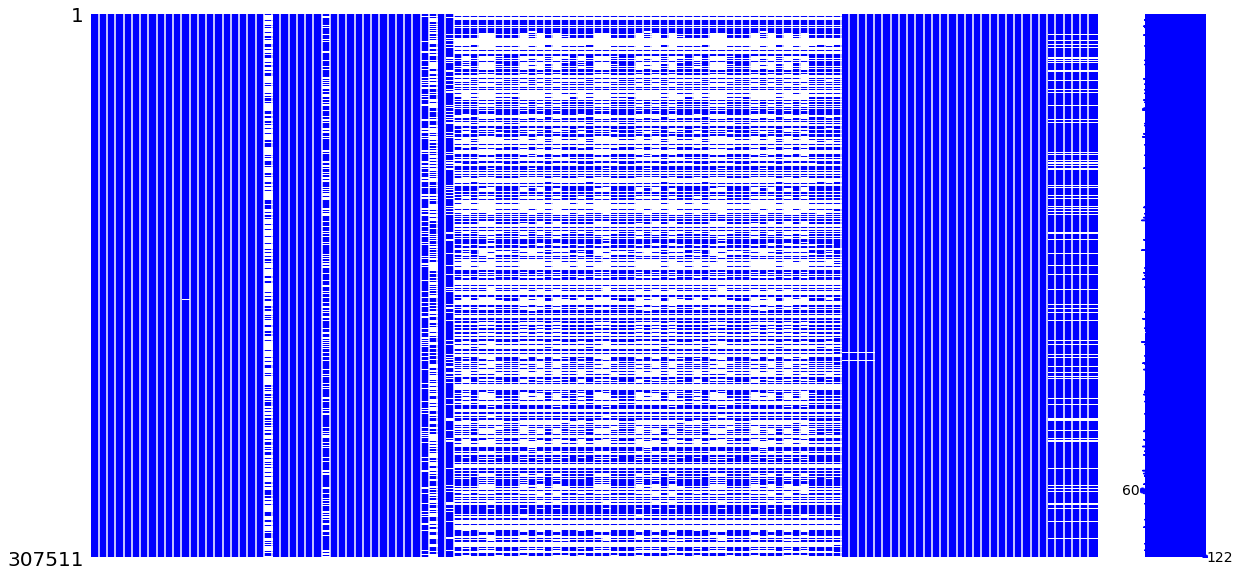

In [6]:
# plot nan matrix 
msno.matrix(to_clean_dataset,figsize=(20,10),color=(0, 0 ,1))

Notice: the dataset has many rows with a lot of Nan values<br> 
Recommended 1: to drop columns with nan values of percentage > 50% 

In [7]:
# drop columns with Nan values > 50%
to_clean_dataset.dropna(thresh= to_clean_dataset.shape[0]* 0.5, axis = 1, inplace=True )
to_clean_dataset.shape

(307511, 81)

Notice: the number of columns decreased from 122 to 81 <br>
when dropped columns with nan values of percentage > 50% <br> 


Recommended 2: fill columns with Nan values < 13% with mean or mode depending on column type 

In [8]:
# get columns with <= 13% 
dirty_cols =to_clean_dataset.columns[to_clean_dataset.isnull().sum() <= 0.13 * to_clean_dataset.shape[0]]

In [9]:
to_clean_dataset[dirty_cols].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 64 columns]

Notice: We will replace with mode values for categorical columns and mean for continous columns<br> 
but for this we will first check if there are any outliers so that the mean values would be correct

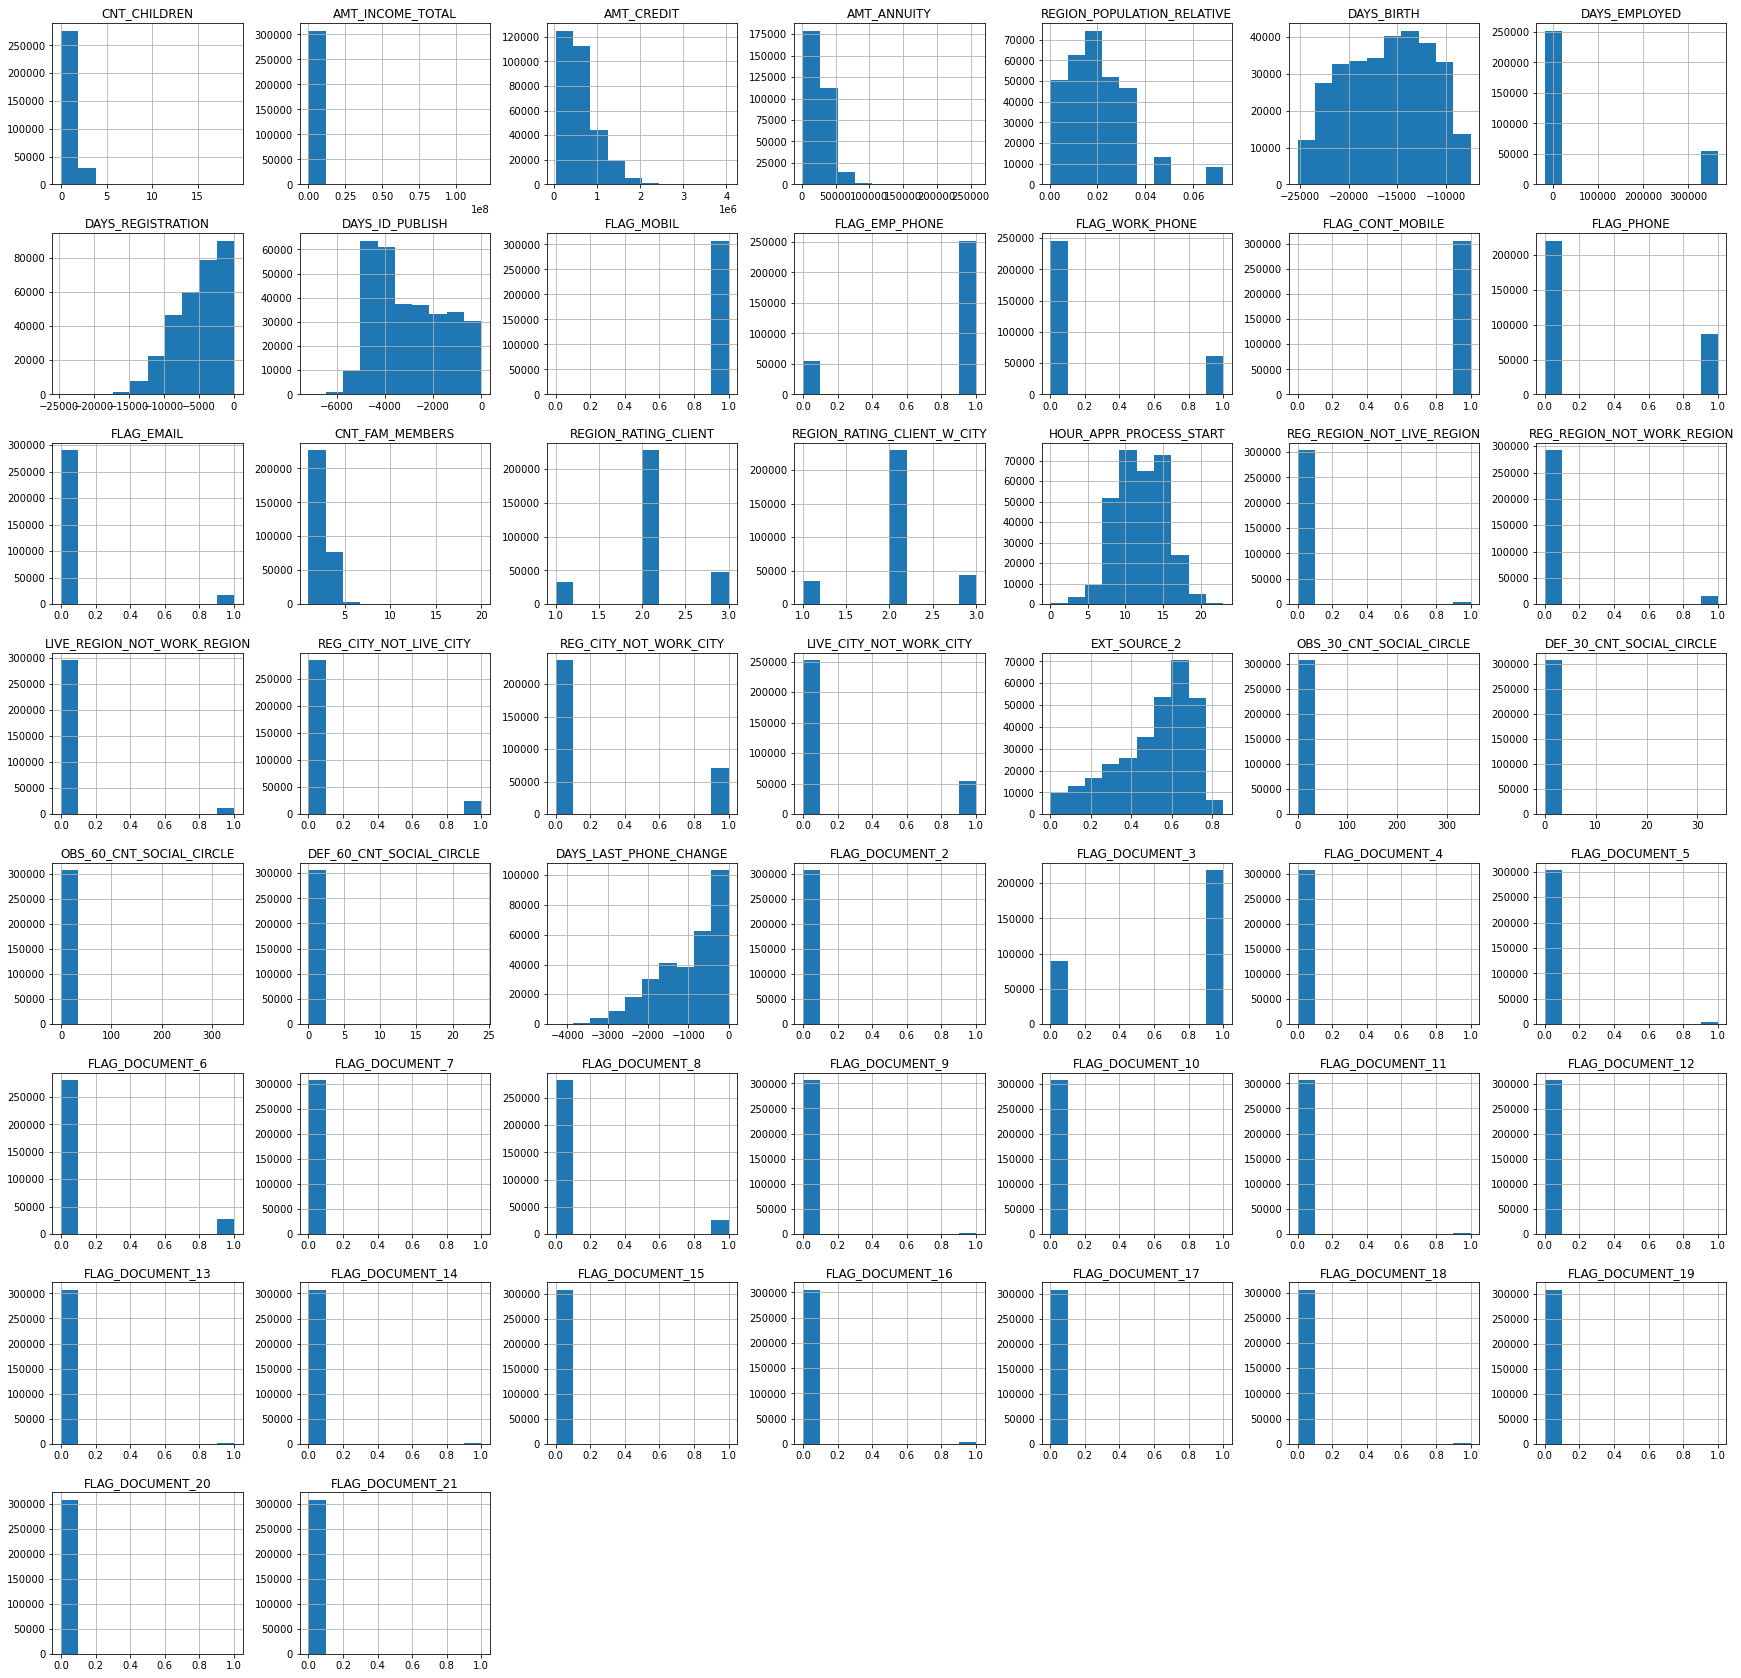

In [10]:
dirty_cols2 = dirty_cols.delete([0,1,10])
_ = to_clean_dataset[dirty_cols2].hist(figsize=(30,30) )

Notice: All columns seems to have valid values (ignoring Nan)<br> 
Now we can fill the columns with mean and mode

In [11]:
# fill Nan of Categorical values with mode value
to_clean_dataset['OCCUPATION_TYPE'].fillna(value= to_clean_dataset['OCCUPATION_TYPE'].mode()[0] ,inplace = True )
to_clean_dataset['ORGANIZATION_TYPE'].fillna(value= to_clean_dataset['ORGANIZATION_TYPE'].mode()[0] ,inplace = True )
to_clean_dataset['EMERGENCYSTATE_MODE'].fillna(value= to_clean_dataset['EMERGENCYSTATE_MODE'].mode()[0] ,inplace = True )
to_clean_dataset['CODE_GENDER'].fillna(value= to_clean_dataset['CODE_GENDER'].mode()[0] ,inplace = True )

# fill Nan of Continous Columns with mean value
to_clean_dataset['EXT_SOURCE_3'].fillna(value= to_clean_dataset['EXT_SOURCE_3'].mean() ,inplace = True )
to_clean_dataset['YEARS_BEGINEXPLUATATION_AVG'].fillna(value= to_clean_dataset['YEARS_BEGINEXPLUATATION_AVG'].mean() ,inplace = True )
to_clean_dataset['FLOORSMAX_AVG'].fillna(value= to_clean_dataset['FLOORSMAX_AVG'].mean() ,inplace = True )
to_clean_dataset['YEARS_BEGINEXPLUATATION_MODE'].fillna(value= to_clean_dataset['YEARS_BEGINEXPLUATATION_MODE'].mean() ,inplace = True )
to_clean_dataset['FLOORSMAX_MODE'].fillna(value= to_clean_dataset['FLOORSMAX_MODE'].mean() ,inplace = True )
to_clean_dataset['YEARS_BEGINEXPLUATATION_MEDI'].fillna(value= to_clean_dataset['YEARS_BEGINEXPLUATATION_MEDI'].mean() ,inplace = True )
to_clean_dataset['TOTALAREA_MODE'].fillna(value= to_clean_dataset['TOTALAREA_MODE'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean() ,inplace = True )
to_clean_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value= to_clean_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean() ,inplace = True )

Notice: For columns with Nan values > 13% and <50% we will drop rows containing Nan values

In [12]:
# drop remaining rows with Nan values 
to_clean_dataset.dropna(inplace=True)
# check if dataset is dirty
to_clean_dataset.isnull().any().any()

False

Notice: Now our dataset has no Nan values

In [13]:
# remove SK_ID_CURR Columns from dataset as it won't be useful for our problem 
to_clean_dataset = to_clean_dataset.drop(labels=['SK_ID_CURR'], axis = 1)

## 2.2 Check invalid values in dataset

In [14]:
to_clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152854 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        152854 non-null  int64  
 1   NAME_CONTRACT_TYPE            152854 non-null  object 
 2   CODE_GENDER                   152854 non-null  object 
 3   FLAG_OWN_CAR                  152854 non-null  object 
 4   FLAG_OWN_REALTY               152854 non-null  object 
 5   CNT_CHILDREN                  152854 non-null  int64  
 6   AMT_INCOME_TOTAL              152854 non-null  float64
 7   AMT_CREDIT                    152854 non-null  float64
 8   AMT_ANNUITY                   152854 non-null  float64
 9   AMT_GOODS_PRICE               152854 non-null  float64
 10  NAME_TYPE_SUITE               152854 non-null  object 
 11  NAME_INCOME_TYPE              152854 non-null  object 
 12  NAME_EDUCATION_TYPE           152854 non-nul

In [15]:
to_clean_dataset.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  152854.000000  152854.000000      1.528540e+05  1.528540e+05   
mean        0.069943       0.389882      1.803566e+05  6.223780e+05   
std         0.255051       0.681378      3.172570e+05  4.195890e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.762775e+05   
50%         0.000000       0.000000      1.575000e+05  5.235975e+05   
75%         0.000000       1.000000      2.250000e+05  8.356050e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  152854.000000     1.528540e+05               152854.000000   
mean    28110.483854     5.611715e+05                    0.022279   
std     15193.102685     3.863918e+05                    0.015533   
min      1993.500000     4.500000e+04                    0.000290   
25%     16965.000000     2.475000e+05                    0.010032   
50%     25690.500000     4.545000e+05                    0.019689   
75%     36000.000000     7.065000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  152854.000000   152854.00000      152854.000000  ...     152854.000000   
mean   -16125.508341    62299.15698       -5229.428487  ...          0.008675   
std      4370.645386   140072.63726        3617.461177  ...          0.092735   
min    -25229.000000   -17912.00000      -24672.000000  ...          0.000000   
25%    -19758.000000    -2860.00000       -7920.000000  ...          0.000000   
50%    -15823.000000    -1241.00000       -4859.000000  ...          0.000000   
75%    -12510.000000     -299.00000       -2076.250000  ...          0.000000   
max     -7678.000000   365243.00000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     152854.000000     152854.000000     152854.000000   
mean           0.000667          0.000622          0.000347   
std            0.025824          0.024922          0.018618   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               152854.000000              152854.000000   
mean                     0.006802                   0.007682   
std                      0.081236                   0.112598   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               152854.000000              152854.000000   
mean                     0.035102                   0.309023   
std                      0.195219                   0.979988   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.267395   
max                      8.000000                  24.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              152854.000000               152854.000000  
mean                    0.267697                    1.895175  
std                     0.882385                    1.757565  
min                     0.000000                

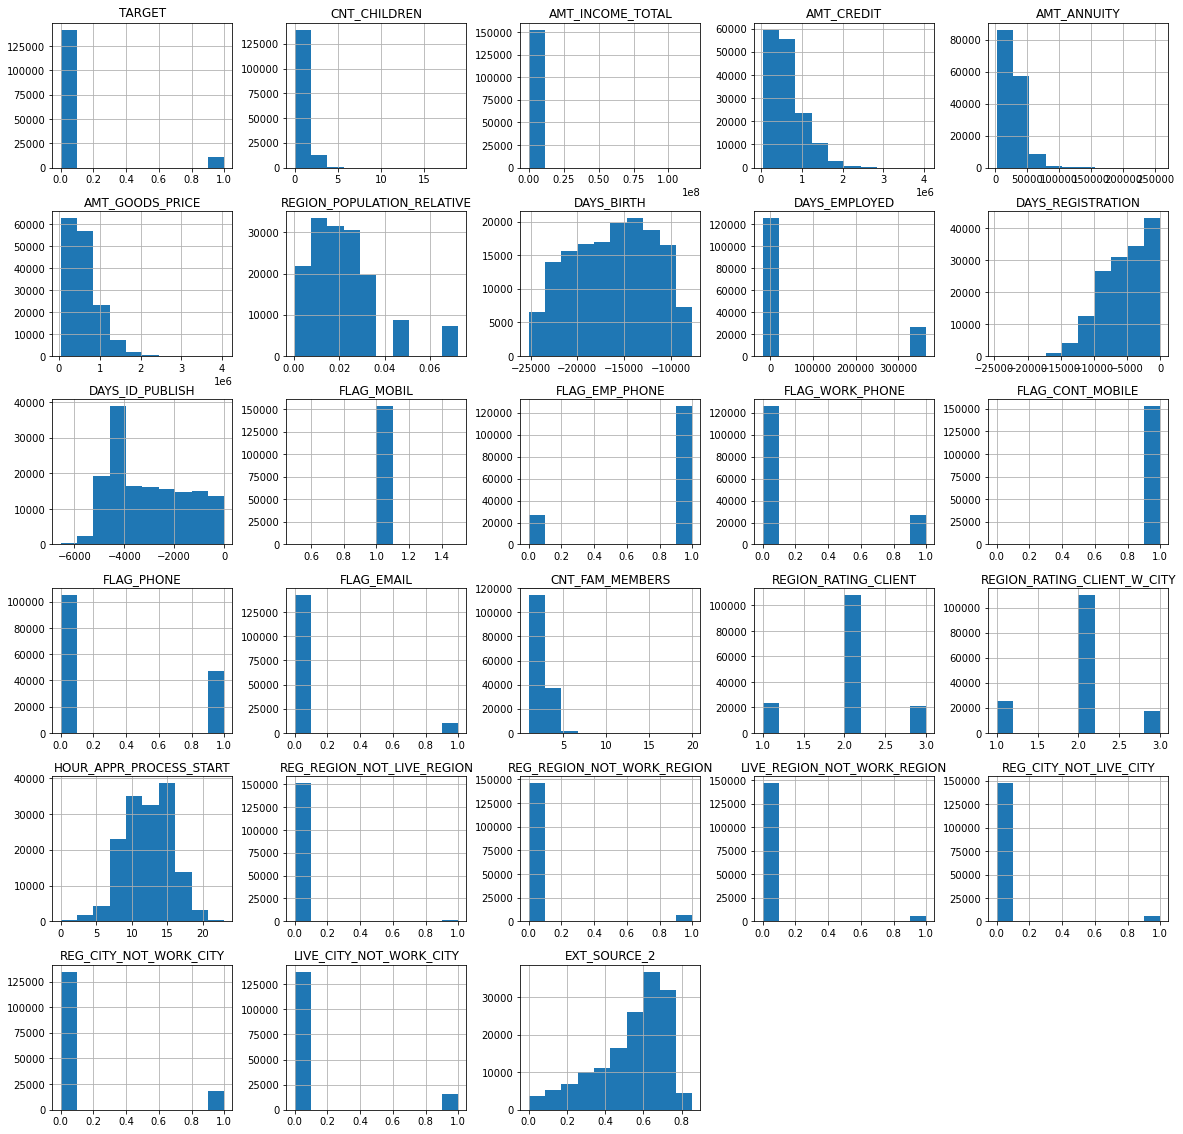

In [16]:
#plt histogram of features
_ = to_clean_dataset[to_clean_dataset.columns[:len(to_clean_dataset.columns)//2]].hist(figsize=(20,20))

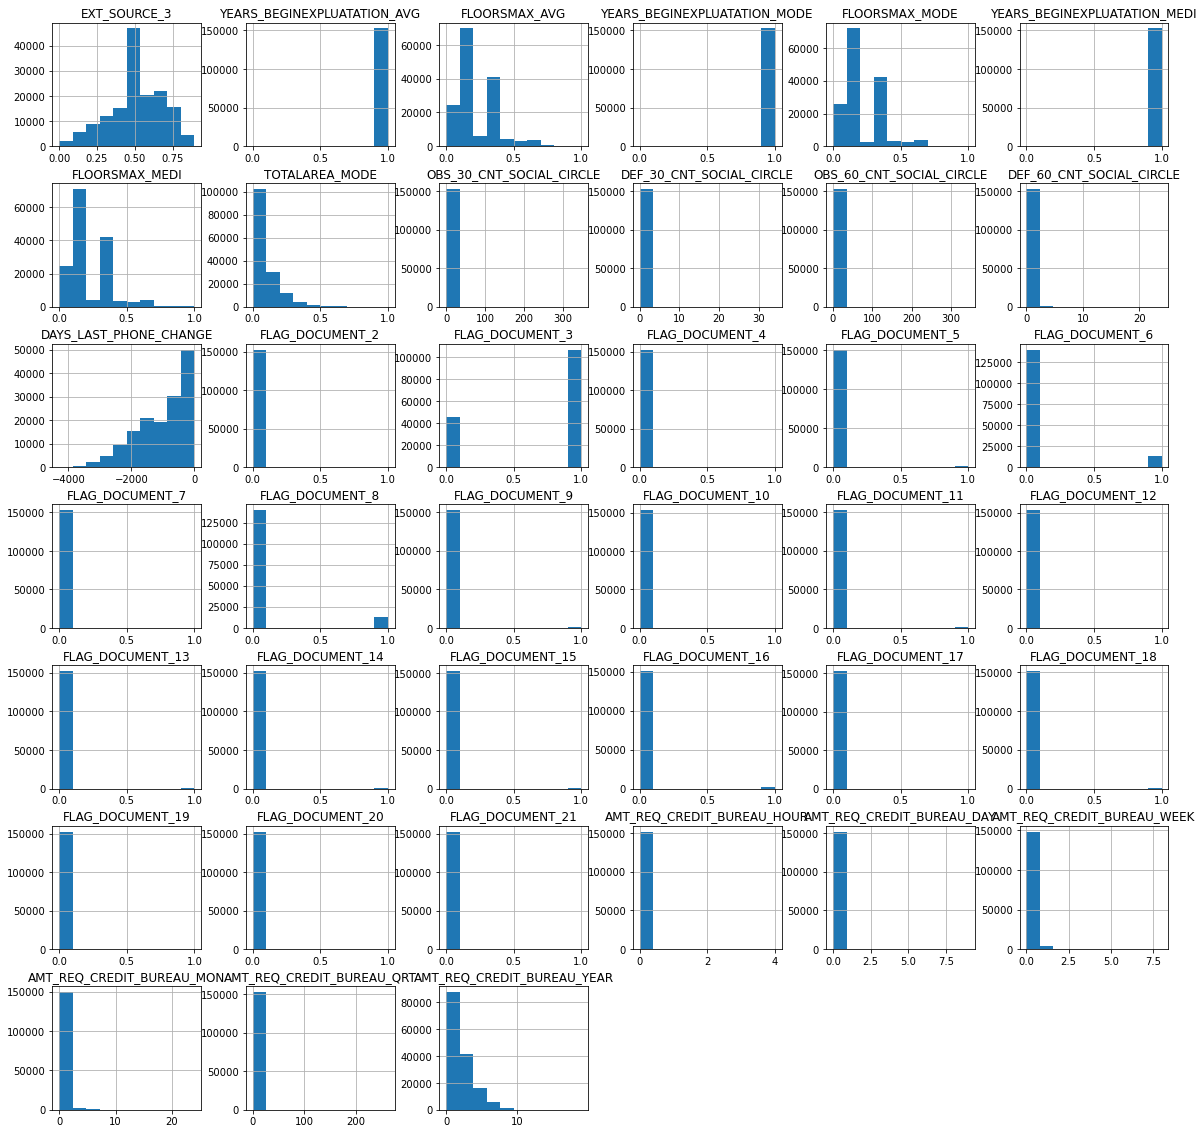

In [17]:
#plt histogram of features
_ = to_clean_dataset[to_clean_dataset.columns[len(to_clean_dataset.columns)//2:]].hist(figsize=(20,20))

Notice: Some variables have negative values where they should be positive such as; <br> 
DAYS_BIRTH, DAYES_REGISTRATION, DAYES_ID_PUBLISH, DAYES_EMPLOYED, DAYES_LAST_PHONE_CHANGE <br> 
assuming the negative sign is added falsely we will convert values to positive

In [18]:
# remove negative sign of features with false negative
to_clean_dataset['DAYS_BIRTH'] = abs(to_clean_dataset['DAYS_BIRTH'] )
to_clean_dataset['DAYS_REGISTRATION'] = abs(to_clean_dataset['DAYS_REGISTRATION'] )
to_clean_dataset['DAYS_ID_PUBLISH'] = abs(to_clean_dataset['DAYS_ID_PUBLISH'] )
to_clean_dataset['DAYS_EMPLOYED'] = abs(to_clean_dataset['DAYS_EMPLOYED'] )
to_clean_dataset['DAYS_LAST_PHONE_CHANGE'] = abs(to_clean_dataset['DAYS_LAST_PHONE_CHANGE'] )

In [19]:
to_clean_dataset.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  152854.000000  152854.000000      1.528540e+05  1.528540e+05   
mean        0.069943       0.389882      1.803566e+05  6.223780e+05   
std         0.255051       0.681378      3.172570e+05  4.195890e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.762775e+05   
50%         0.000000       0.000000      1.575000e+05  5.235975e+05   
75%         0.000000       1.000000      2.250000e+05  8.356050e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  152854.000000     1.528540e+05               152854.000000   
mean    28110.483854     5.611715e+05                    0.022279   
std     15193.102685     3.863918e+05                    0.015533   
min      1993.500000     4.500000e+04                    0.000290   
25%     16965.000000     2.475000e+05                    0.010032   
50%     25690.500000     4.545000e+05                    0.019689   
75%     36000.000000     7.065000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  152854.000000  152854.000000      152854.000000  ...     152854.000000   
mean    16125.508341   66336.610890        5229.428487  ...          0.008675   
std      4370.645386  138206.292647        3617.461177  ...          0.092735   
min      7678.000000       0.000000           0.000000  ...          0.000000   
25%     12510.000000     940.000000        2076.250000  ...          0.000000   
50%     15823.000000    2263.000000        4859.000000  ...          0.000000   
75%     19758.000000    5770.000000        7920.000000  ...          0.000000   
max     25229.000000  365243.000000       24672.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     152854.000000     152854.000000     152854.000000   
mean           0.000667          0.000622          0.000347   
std            0.025824          0.024922          0.018618   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               152854.000000              152854.000000   
mean                     0.006802                   0.007682   
std                      0.081236                   0.112598   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               152854.000000              152854.000000   
mean                     0.035102                   0.309023   
std                      0.195219                   0.979988   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.267395   
max                      8.000000                  24.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              152854.000000               152854.000000  
mean                    0.267697                    1.895175  
std                     0.882385                    1.757565  
min                     0.000000                

In [20]:
clean_dataset = to_clean_dataset.copy()

Notice: Considering the very large amount of features that won't be usefull for classification<br>  
We will apply bivariate analysis first to remove redundant features<br> 
then We will analyize the usefull features

# 3. Bivariate Analysis
## 3.1 Continuous Vs Continuous
Remove features that are correlated

In [21]:
# check types of columns 
clean_dataset.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [22]:
# select columns with only two categories (binary)
binary_features = [col for col in clean_dataset.columns if clean_dataset[col].unique().size <= 2]

In [23]:
# select continuous features 
cont_cols = clean_dataset.columns[(clean_dataset.dtypes == 'int64')|(clean_dataset.dtypes == 'float64')]
# remove binary features from result 
cont_cols = [col for col in cont_cols if col not in binary_features]

In [24]:
# get columns with correlation > threshold
def get_correlated(cor, thr):
    corr_idx = []
    for i in range(cor.shape[0]): 
        for j in range(i, cor.shape[1]): 
            if i != j and abs(cor[i,j]) >= thr:
                corr_idx.append((i,j))
    
    return corr_idx

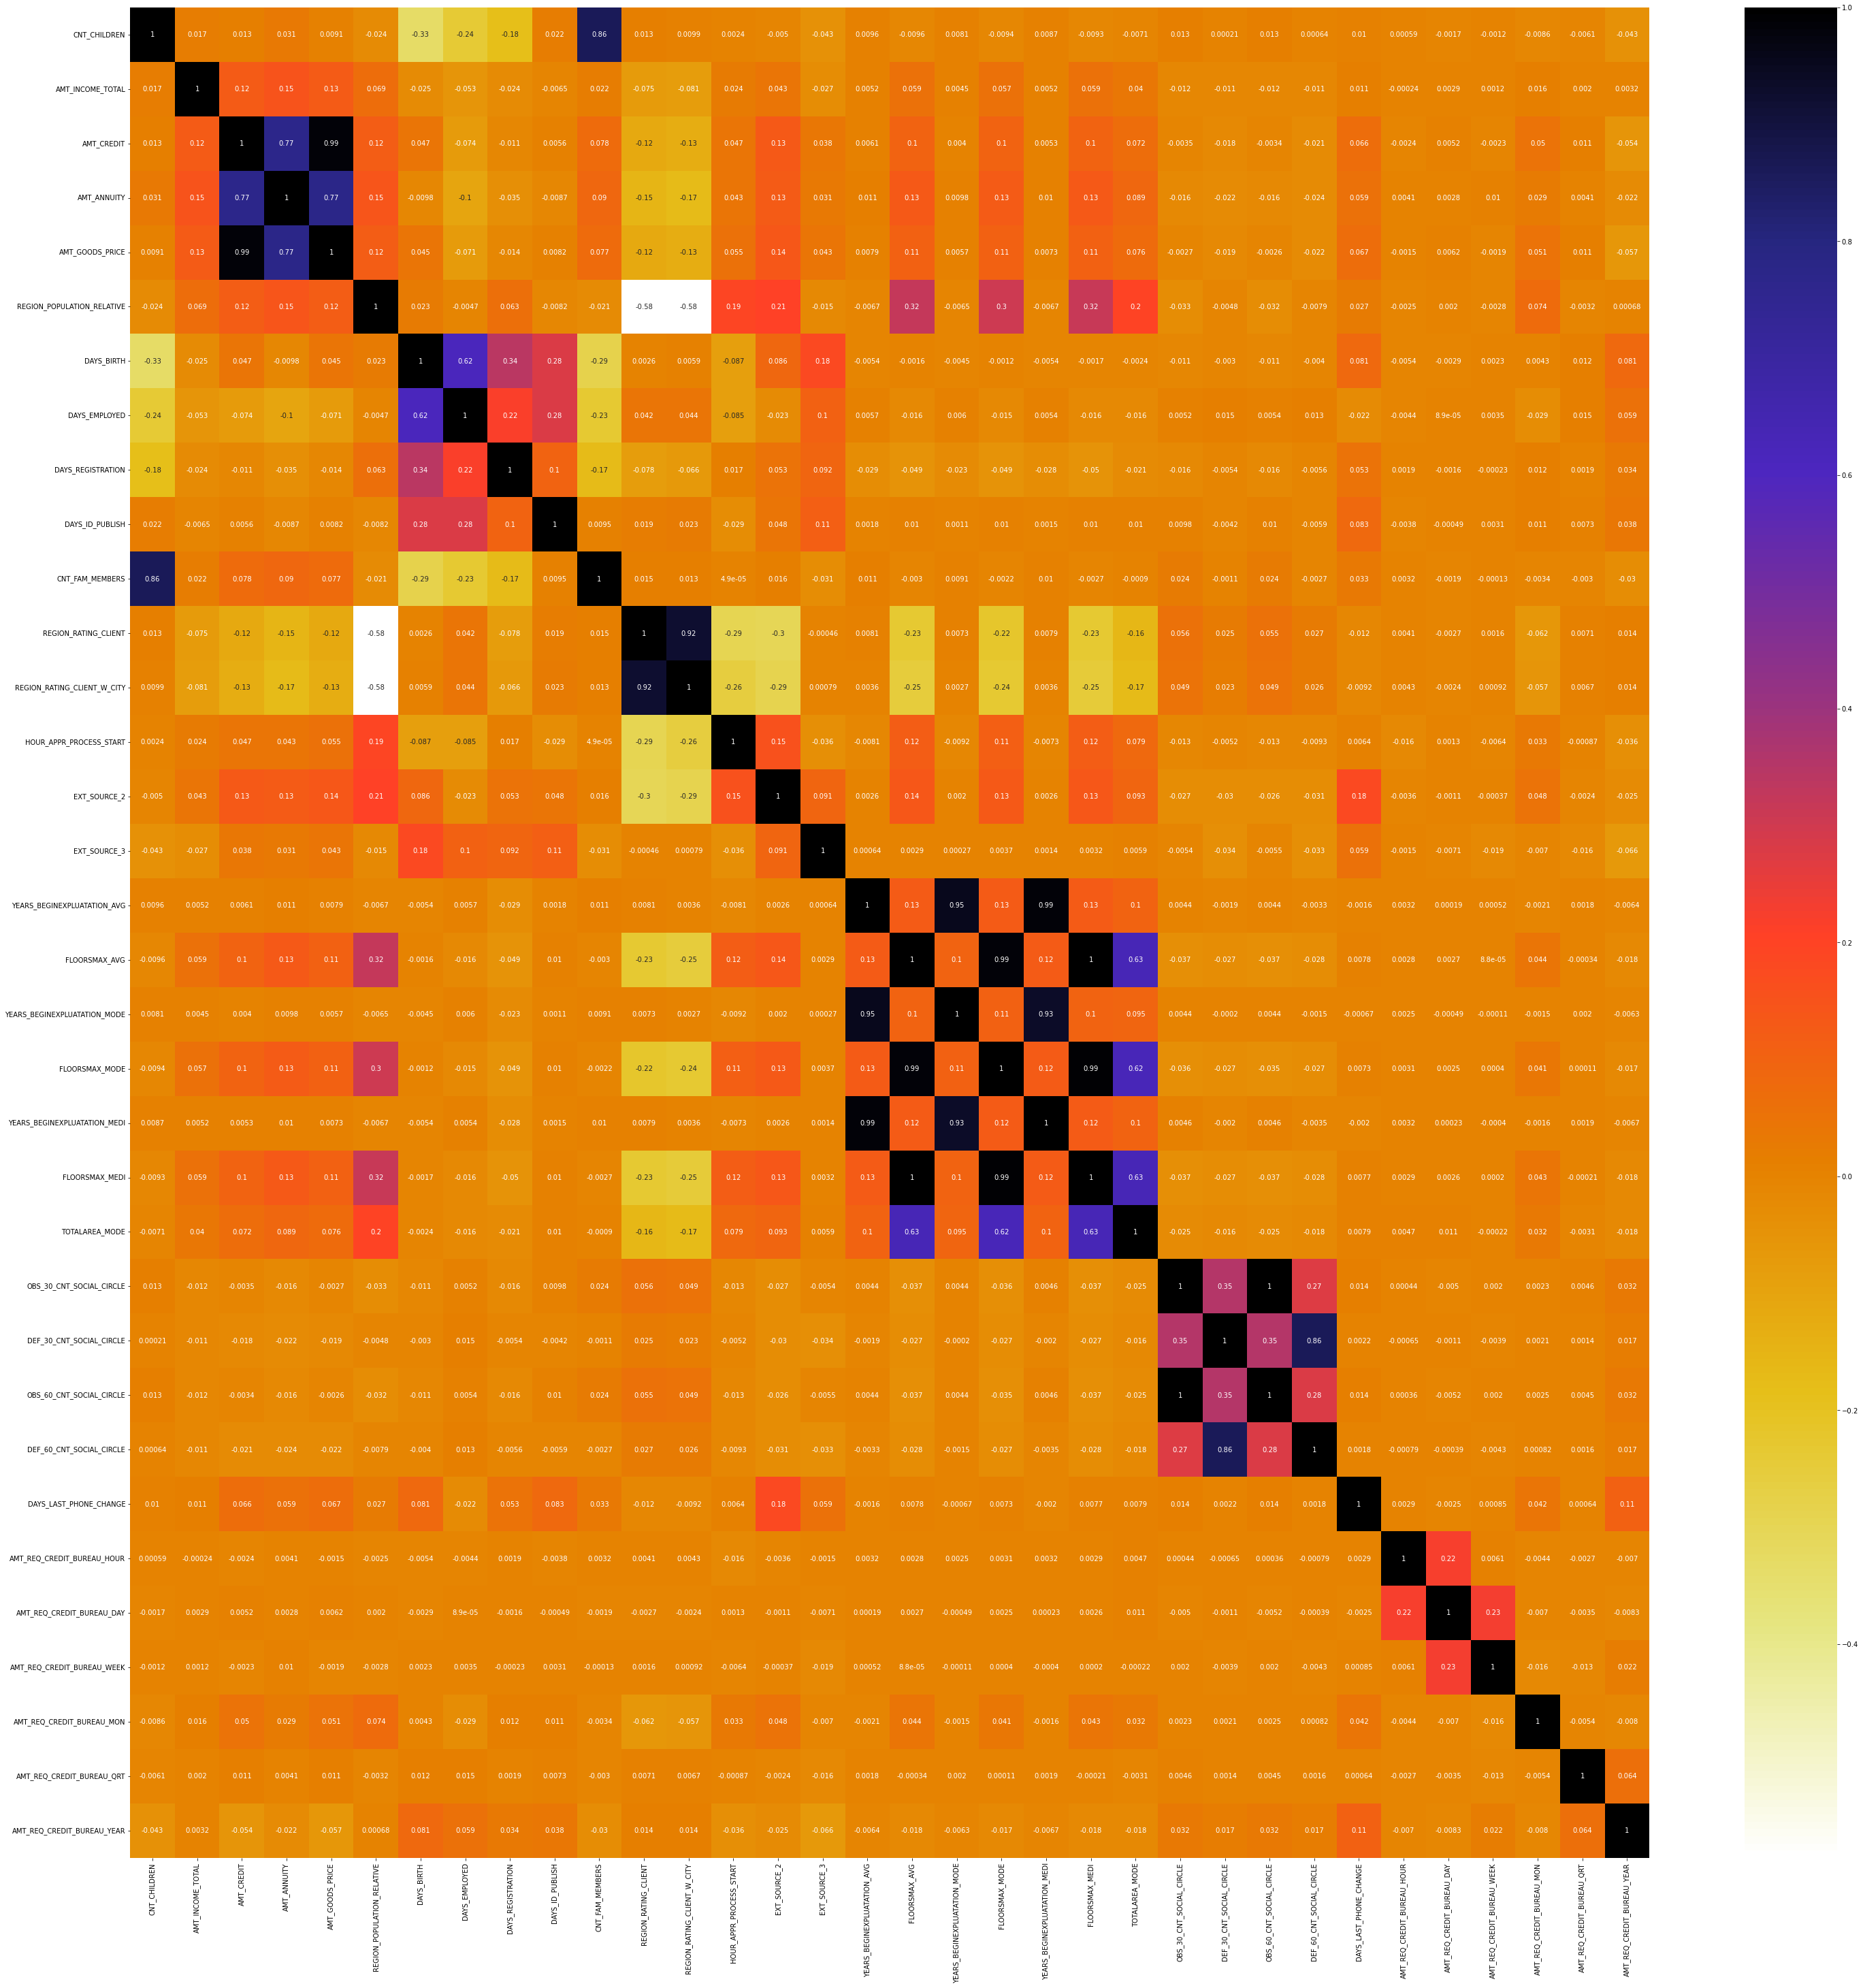

In [25]:
# compute correlation matrix of continous features 
cor = clean_dataset[cont_cols].corr()
#plot heatmap of correlation matrix 
plt.figure(figsize=(50,50))
_ = sns.heatmap(data = cor ,cmap=plt.cm.CMRmap_r, annot= True)

Notice: From the heat map above we can see that some features are highly correlated (dark cells).<br> 
So, we will remove some features to get independent features. Our correlation threshold is 0.85

In [26]:
# get index of correlated features 
corr_idx = get_correlated(cor.to_numpy(), 0.85)
# get index of one feature for each two correlated features 
indicies =np.unique([idx for idx,_ in corr_idx])
# drop one of each two correlated features 
for idx in indicies:
    clean_dataset.drop(cont_cols[idx], axis = 1, inplace=True)
clean_dataset.shape

(152854, 71)

Notice: Removed 9 columns, the features decreased from 80 to 71 features 

## 3.2 Continous Vs Output (Categorical)
remove features that are **NOT** correlated to ouput

In [27]:
# select continuous features 
cont_cols = clean_dataset.columns[(clean_dataset.dtypes == 'int64')|(clean_dataset.dtypes == 'float64')]
cont_cols = [col for col in cont_cols if col not in binary_features]

# select categroical features 
cat_cols = clean_dataset.columns[(clean_dataset.dtypes != 'int64')&(clean_dataset.dtypes != 'float64')].values
cat_cols = np.append(cat_cols, binary_features)

In [28]:
# draw box plot of categorical vs continuous 
def cont_cat_boxplot(cat_col, cont_col):
    plt.figure()
    sns.boxplot(data = clean_dataset, x= cat_col, y = cont_col, order=clean_dataset[cat_col].value_counts().index)
    plt.xticks(rotation = 90)
    plt.show()
    plt.close()

# draw box plot of out (TARGET) vs continuous     
def cont_vs_out(out, cont_col):
    plt.figure()
    sns.boxplot(data = clean_dataset, x= out, y = cont_col, order=out.value_counts().index)
    plt.xticks(rotation = 90)
    plt.show()
    plt.close()

Notice: We will remove features that are not useful for prediction<br> 
From the box plot, if feature axis has same distribution for all categories of categorical<br> 
feature on X axis, then there is no relation between Y axis and X axis, hence, we will remove this feature
because it is a weak regressor. 


AMT_INCOME_TOTAL


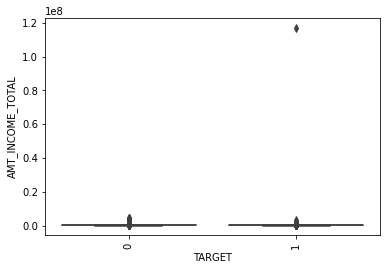

AMT_ANNUITY


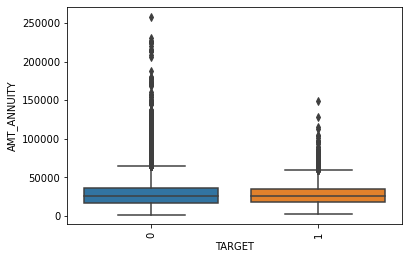

AMT_GOODS_PRICE


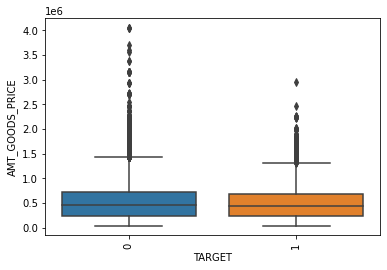

REGION_POPULATION_RELATIVE


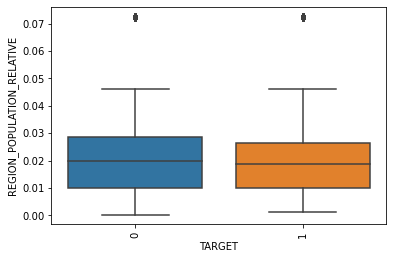

DAYS_BIRTH


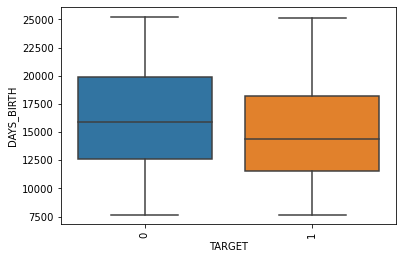

DAYS_EMPLOYED


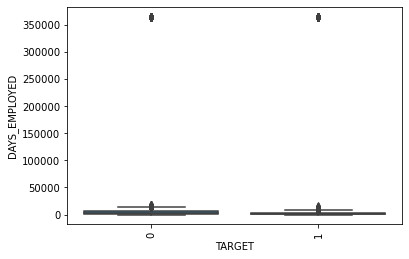

DAYS_REGISTRATION


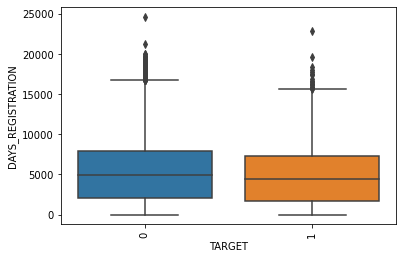

DAYS_ID_PUBLISH


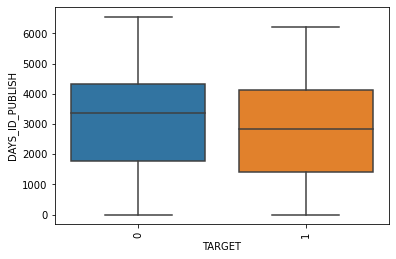

CNT_FAM_MEMBERS


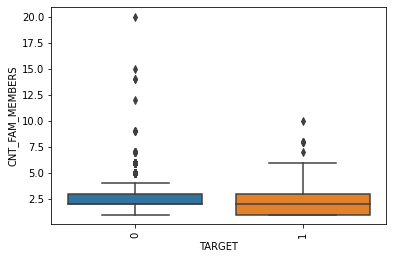

REGION_RATING_CLIENT_W_CITY


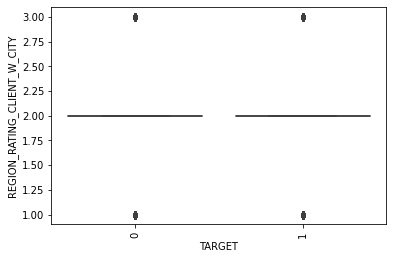

HOUR_APPR_PROCESS_START


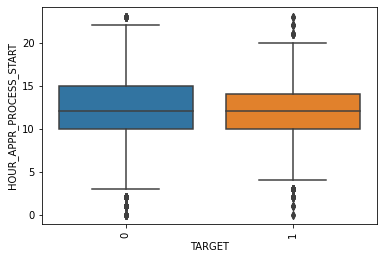

EXT_SOURCE_2


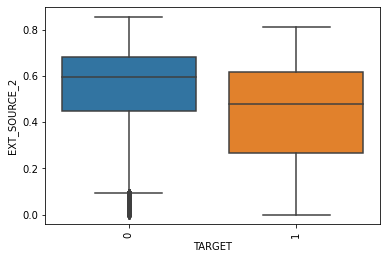

EXT_SOURCE_3


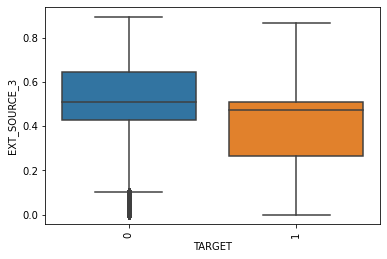

YEARS_BEGINEXPLUATATION_MEDI


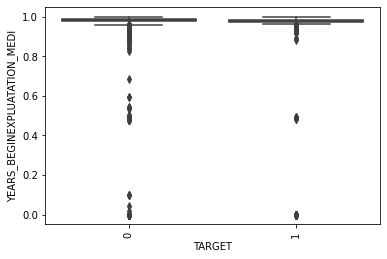

FLOORSMAX_MEDI


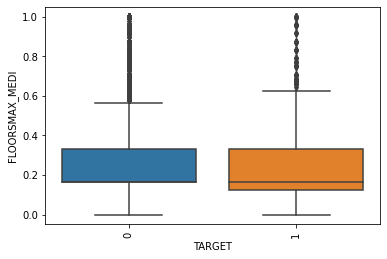

TOTALAREA_MODE


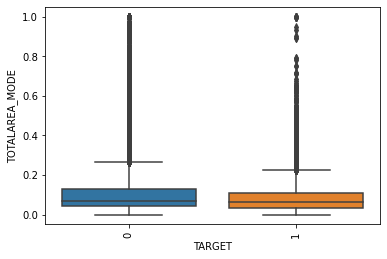

OBS_60_CNT_SOCIAL_CIRCLE


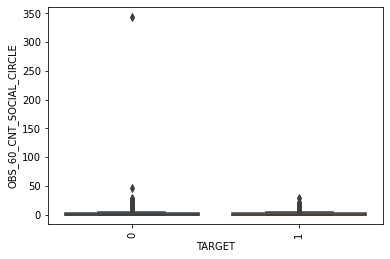

DEF_60_CNT_SOCIAL_CIRCLE


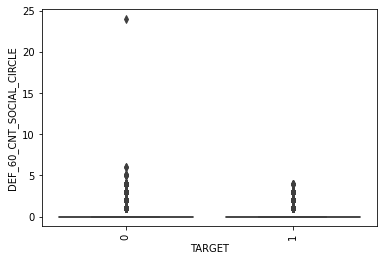

DAYS_LAST_PHONE_CHANGE


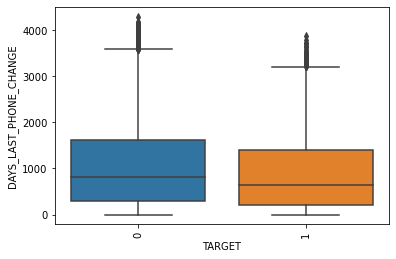

AMT_REQ_CREDIT_BUREAU_HOUR


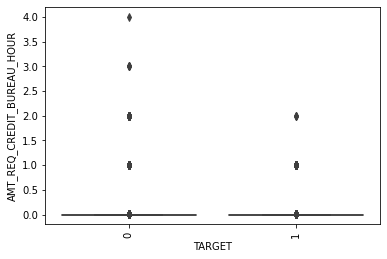

AMT_REQ_CREDIT_BUREAU_DAY


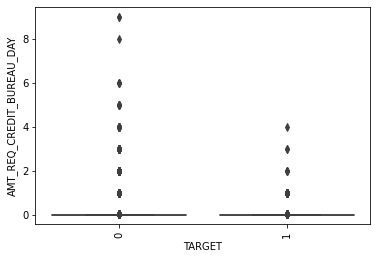

AMT_REQ_CREDIT_BUREAU_WEEK


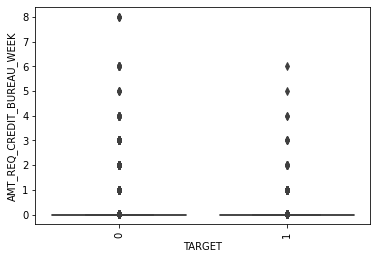

AMT_REQ_CREDIT_BUREAU_MON


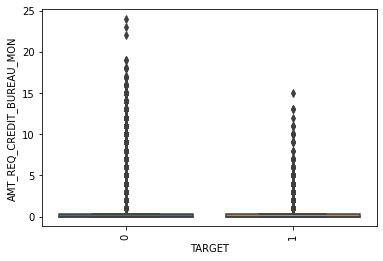

AMT_REQ_CREDIT_BUREAU_QRT


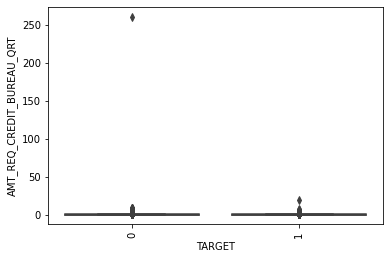

AMT_REQ_CREDIT_BUREAU_YEAR


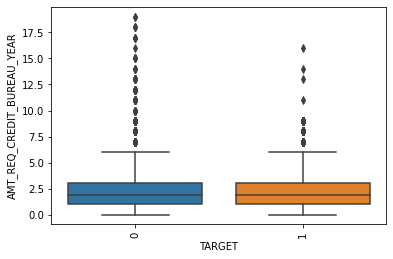

In [29]:
Y = clean_dataset['TARGET']
for j in range(len(cont_cols)):
    print(cont_cols[j])
    cont_vs_out(Y, cont_cols[j])

Notice: After drawing box plot of continuous features vs output TARGET<br> 
We notice that the distribution for many features is almost the same for both output values<br> 
Which indicates that the output doesn't depend on those features. From the above plot we decided to remove the following features as they won't be useful: ['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_REGISTRATION',
                    'DAYS_ID_PUBLISH','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START'
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','DAYS_LAST_PHONE_CHANGE',
                    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

In [30]:
#useless features (independent of output class)
useless_features = ['AMT_ANNUITY','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_REGISTRATION',
                    'REGION_RATING_CLIENT_W_CITY',
                    'YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE','DAYS_LAST_PHONE_CHANGE',
                    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']
# No. of redundant features 
len(useless_features)

13

Notice: Columns; OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_QRT, AMT_INCOME_TOTAL, DAYS_EMPLOYED 
Have outliers, we will remove the ouliers and see distribution again

In [31]:
# drop outliers detected through the box plot
clean_dataset.drop((clean_dataset[clean_dataset.OBS_60_CNT_SOCIAL_CIRCLE > 40].index), axis = 0, inplace= True)
clean_dataset.drop((clean_dataset[clean_dataset.DEF_60_CNT_SOCIAL_CIRCLE > 20].index), axis = 0, inplace= True)
clean_dataset.drop((clean_dataset[clean_dataset.AMT_REQ_CREDIT_BUREAU_QRT > 200].index), axis = 0, inplace= True)
clean_dataset.drop((clean_dataset[clean_dataset.AMT_INCOME_TOTAL > 0.4e6].index), axis = 0, inplace= True)
clean_dataset.drop((clean_dataset[clean_dataset.DAYS_EMPLOYED > 300000].index), axis = 0, inplace= True)

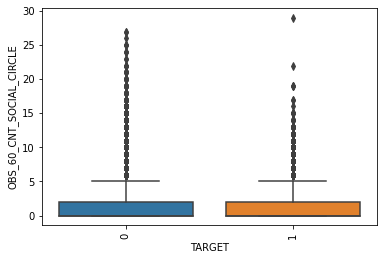

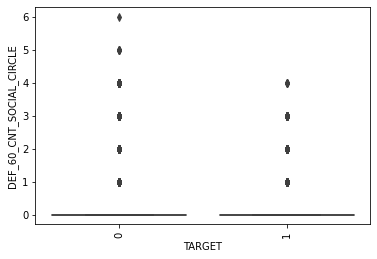

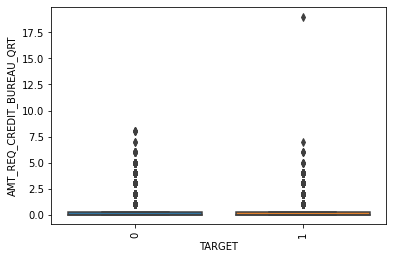

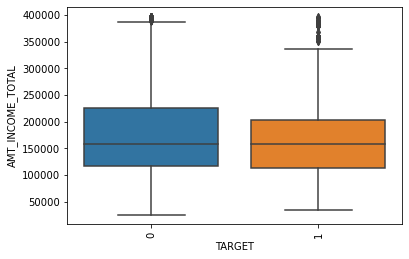

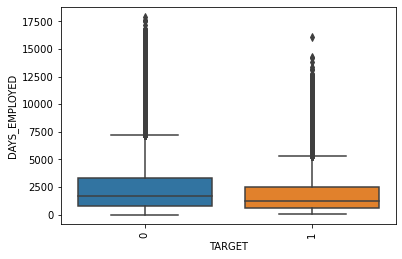

In [32]:
#plot box plot of features after removing outliers 
cont_vs_out(Y, clean_dataset.OBS_60_CNT_SOCIAL_CIRCLE)
cont_vs_out(Y, clean_dataset.DEF_60_CNT_SOCIAL_CIRCLE)
cont_vs_out(Y, clean_dataset.AMT_REQ_CREDIT_BUREAU_QRT)
cont_vs_out(Y, clean_dataset.AMT_INCOME_TOTAL)
cont_vs_out(Y, clean_dataset.DAYS_EMPLOYED)

Notice: They also are independent of output so we will remove them too except DAYS_EMPLOYES, AMT_INCOME_TOTAL there is sort of dependence

In [33]:
# add features to useless features (independent of output class)
useless_features.extend(['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT'])

In [34]:
# drop useless features 
clean_dataset.drop(useless_features, axis = 1, inplace= True)

In [35]:
# check data shape
clean_dataset.shape

(121091, 55)

Notice Now we have 55 regressors

## 3.3 Binary Categorical Vs binary categorical
For this problem we will use ***PEARSON' R*** method to calculate correlation between <br> binary categorical features<br> 
Remove Features that are correlated

In [36]:
#convert binary categorical type to numerical values
clean_dataset['FLAG_OWN_REALTY'] = pd.get_dummies(clean_dataset['FLAG_OWN_REALTY'], drop_first=True, prefix = 'FLAG_OWN_REALTY', dtype=np.int64)
clean_dataset['FLAG_OWN_CAR'] = pd.get_dummies(clean_dataset['FLAG_OWN_CAR'], drop_first=True, prefix = 'FLAG_OWN_CAR', dtype=np.int64)
clean_dataset['CODE_GENDER'] = pd.get_dummies(clean_dataset['CODE_GENDER'], drop_first=True, prefix = 'CODE_GENDER', dtype=np.int64)
clean_dataset['NAME_CONTRACT_TYPE'] = pd.get_dummies(clean_dataset['NAME_CONTRACT_TYPE'], drop_first=True, prefix = 'NAME_CONTRACT_TYPE', dtype=np.int64)
clean_dataset['EMERGENCYSTATE_MODE'] = pd.get_dummies(clean_dataset['EMERGENCYSTATE_MODE'], drop_first=True, prefix = 'EMERGENCYSTATE_MODE', dtype=np.int64)

In [37]:
clean_dataset[binary_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121091 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   TARGET                       121091 non-null  int64
 1   NAME_CONTRACT_TYPE           121091 non-null  int64
 2   CODE_GENDER                  121091 non-null  int64
 3   FLAG_OWN_CAR                 121091 non-null  int64
 4   FLAG_OWN_REALTY              121091 non-null  int64
 5   FLAG_MOBIL                   121091 non-null  int64
 6   FLAG_EMP_PHONE               121091 non-null  int64
 7   FLAG_WORK_PHONE              121091 non-null  int64
 8   FLAG_CONT_MOBILE             121091 non-null  int64
 9   FLAG_PHONE                   121091 non-null  int64
 10  FLAG_EMAIL                   121091 non-null  int64
 11  REG_REGION_NOT_LIVE_REGION   121091 non-null  int64
 12  REG_REGION_NOT_WORK_REGION   121091 non-null  int64
 13  LIVE_REGION_NOT_WORK_REGION  

In [38]:
# calculate pearsonr value for binary categorical features 
r_matrix = np.zeros((len(binary_features), len(binary_features)))
for i in range(1, len(binary_features)):
    for j in range(1,len(binary_features)):
        r = stats.pearsonr(clean_dataset[binary_features[i]], clean_dataset[binary_features[j]])
        # check p_value > thr
        if r[1] <= 0.05: # check if correlation is statistically significant
            r_matrix[i, j] = r[0]

/home/khalid/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


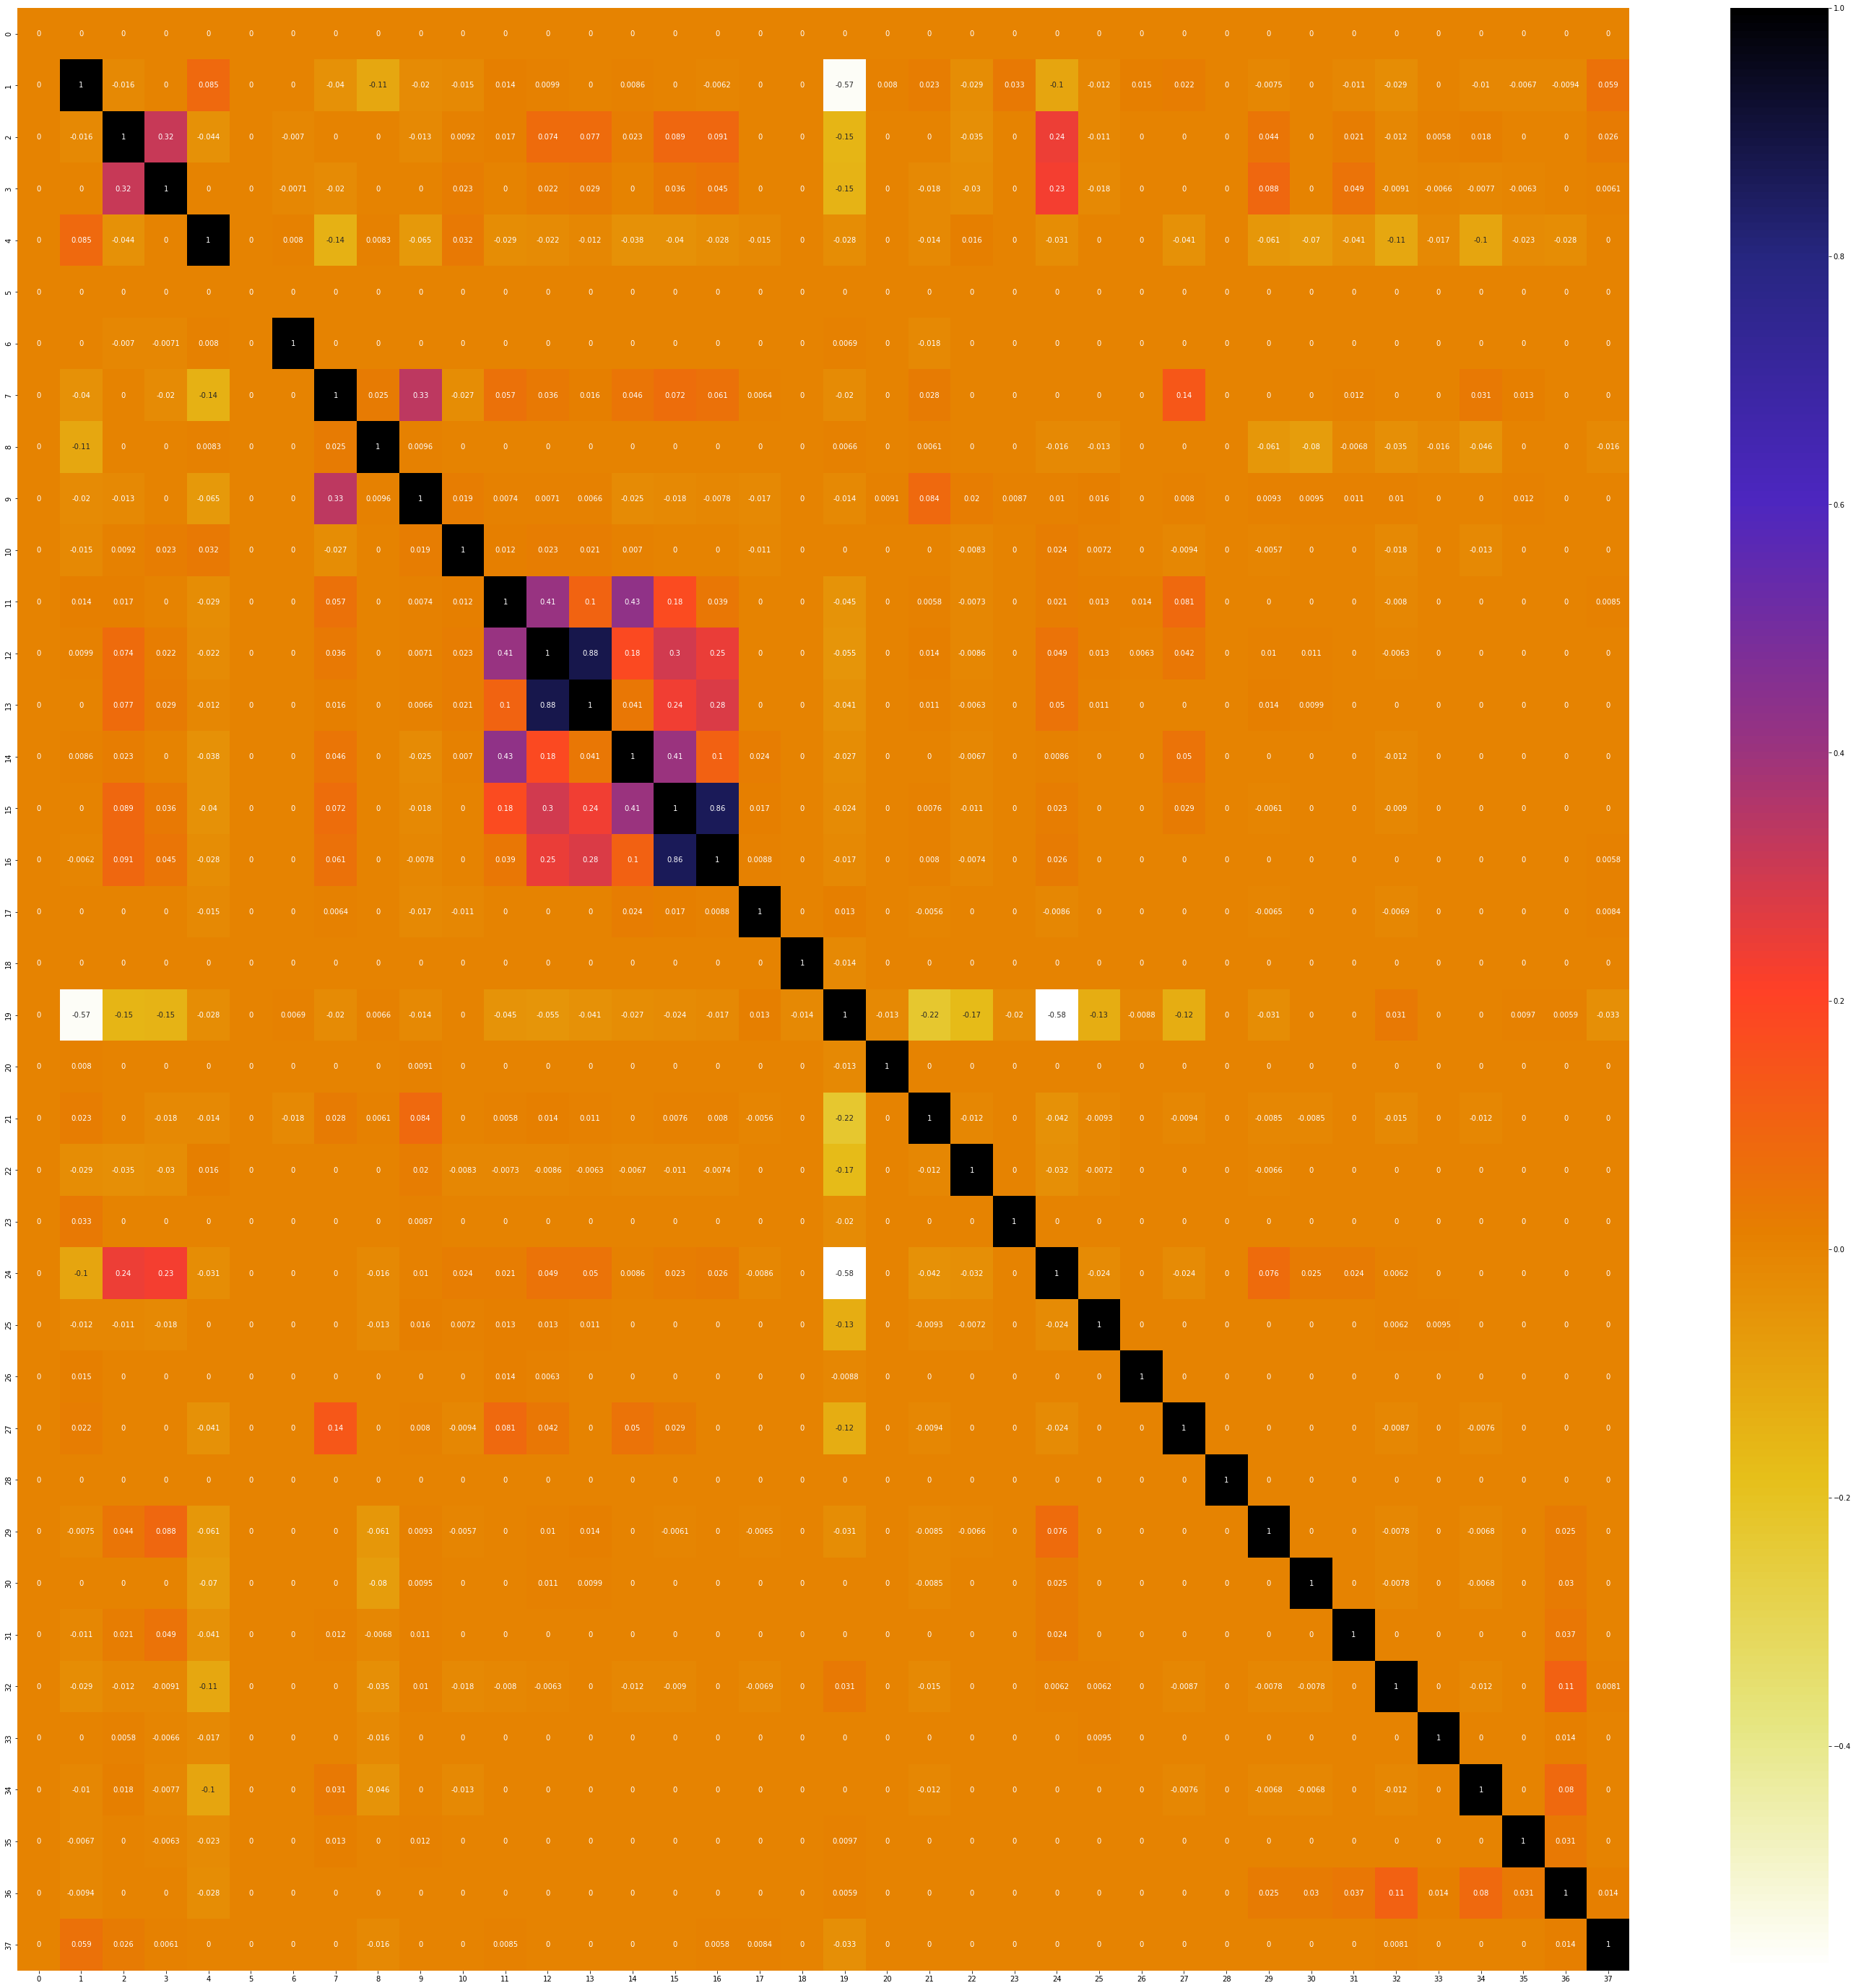

In [39]:
#plot heatmap of pearson'r correlation matrix 
plt.figure(figsize=(50,50))
_ = sns.heatmap(data = r_matrix ,cmap=plt.cm.CMRmap_r, annot= True)

In [40]:
clean_dataset.shape

(121091, 55)

In [41]:
r_matrix.max(), r_matrix.min()

(1.0, -0.5810733587661624)

In [42]:
# get index of correlated features 
corr_idx = get_correlated(r_matrix, 0.85)
# get index of one feature for each two correlated features 
indicies =np.unique([idx for idx,_ in corr_idx])
# drop one of each two correlated features 
for idx in indicies:
    clean_dataset.drop(binary_features[idx], axis = 1, inplace=True)
    binary_features.remove(binary_features[idx])
clean_dataset.shape

(121091, 53)

We can notice that there were 2 binary features that are correlated to another 
features.

## Binary Features Vs Ouput 
Remove Features that are **NOT** correlated to ouput

In [43]:
# calculate pearsonr value for binary categorical features 
corr_features = np.zeros(len(binary_features))
for i in range(len(binary_features)):
    r = stats.pearsonr(clean_dataset[binary_features[i]], clean_dataset['TARGET'])
    # check if correlation is significant 
    if r[1] <= 0.05: 
        # get correlation value
        corr_features[i] = r[0]    

/home/khalid/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


we will keep features that has significant correlation

In [44]:
binary_to_keep = [f for i,f in enumerate(binary_features) if corr_features[i] > 0.05]

In [45]:
binary_to_keep

['TARGET', 'CODE_GENDER']

Notice: All binary features except CODE_GENDER, doesn't have any correlation with output, so we will drop all of them

In [46]:
features = [f for f in binary_features if f not in binary_to_keep]
clean_dataset.drop(features, axis = 1, inplace=True)
clean_dataset.shape

(121091, 19)

In [47]:
clean_dataset.head()

TARGET  CODE_GENDER  AMT_INCOME_TOTAL NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        1            1          202500.0   Unaccompanied          Working   
1        0            0          270000.0          Family    State servant   
12       0            0           67500.0   Unaccompanied          Working   
13       0            1          225000.0   Unaccompanied          Working   
14       0            0          189000.0   Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1                Higher education               Married  House / apartment   
12  Secondary / secondary special               Married  House / apartment   
13  Secondary / secondary special               Married  House / apartment   
14  Secondary / secondary special               Married  House / apartment   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0         9461            637             2120        Laborers   
1        16765           1188              291      Core staff   
12       13439           2717             3227        Laborers   
13       14086           3028             4911         Drivers   
14       14583            203             2056        Laborers   

    CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               1.0                  WEDNESDAY                       10   
1               2.0                     MONDAY                       11   
12              2.0                     FRIDAY                       10   
13              3.0                   THURSDAY                       13   
14              2.0                     MONDAY                        9   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_MEDI  
0   Business Entity Type 3      0.262949      0.139376          0.0833  
1                   School      0.622246      0.510853          0.2917  
12  Business Entity Type 2      0.715042      0.176653          0.1667  
13           Self-employed      0.566907      0.770087          0.3333  
14       Transport: type 2      0.642656      0.510853          0.6667

In [48]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121091 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      121091 non-null  int64  
 1   CODE_GENDER                 121091 non-null  int64  
 2   AMT_INCOME_TOTAL            121091 non-null  float64
 3   NAME_TYPE_SUITE             121091 non-null  object 
 4   NAME_INCOME_TYPE            121091 non-null  object 
 5   NAME_EDUCATION_TYPE         121091 non-null  object 
 6   NAME_FAMILY_STATUS          121091 non-null  object 
 7   NAME_HOUSING_TYPE           121091 non-null  object 
 8   DAYS_BIRTH                  121091 non-null  int64  
 9   DAYS_EMPLOYED               121091 non-null  int64  
 10  DAYS_ID_PUBLISH             121091 non-null  int64  
 11  OCCUPATION_TYPE             121091 non-null  object 
 12  CNT_FAM_MEMBERS             121091 non-null  float64
 13  WEEKDAY_APPR_P

## 3.4 Multiple Categorical Vs Continuous
Remove correlated features

In [49]:
# get muliple categorical features 
cat_cols = clean_dataset.columns[(clean_dataset.dtypes == 'object')]
cont_cols = clean_dataset.columns[(clean_dataset.dtypes == 'int64')|(clean_dataset.dtypes == 'float64')]
cont_cols = [col for col in cont_cols if col not in binary_features]

AMT_INCOME_TOTAL vs NAME_TYPE_SUITE


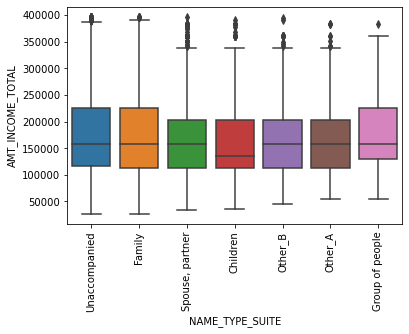

AMT_INCOME_TOTAL vs NAME_INCOME_TYPE


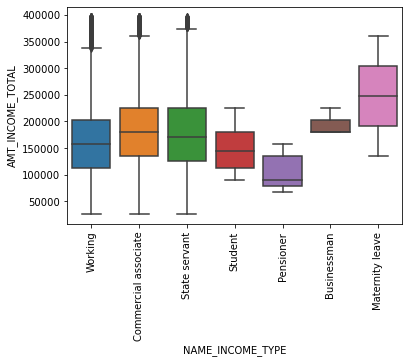

AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE


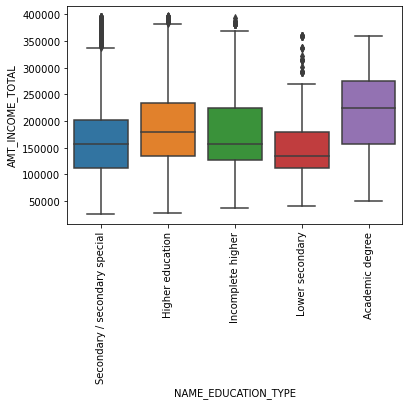

AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS


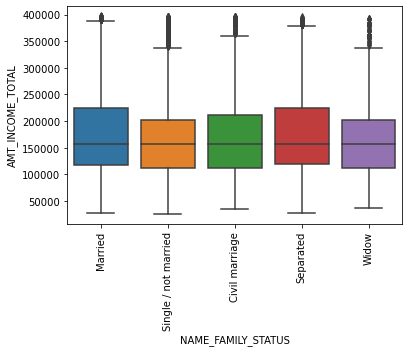

AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE


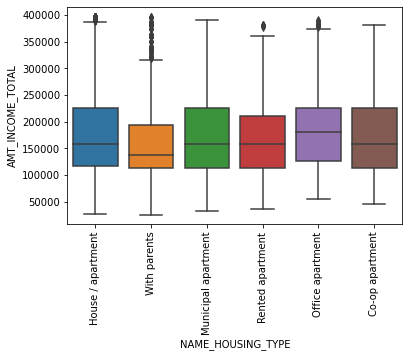

AMT_INCOME_TOTAL vs OCCUPATION_TYPE


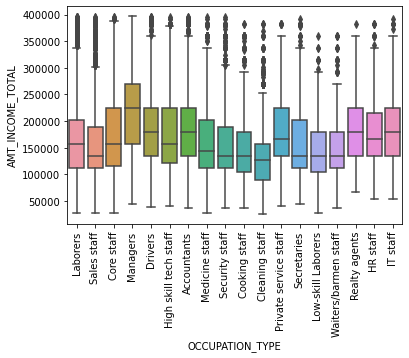

AMT_INCOME_TOTAL vs WEEKDAY_APPR_PROCESS_START


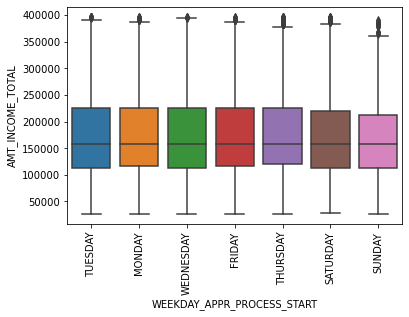

AMT_INCOME_TOTAL vs ORGANIZATION_TYPE


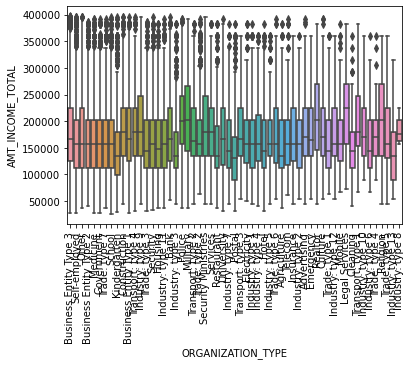

DAYS_BIRTH vs NAME_TYPE_SUITE


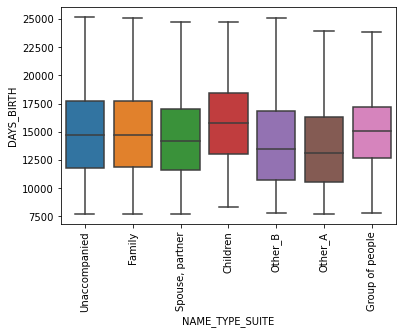

DAYS_BIRTH vs NAME_INCOME_TYPE


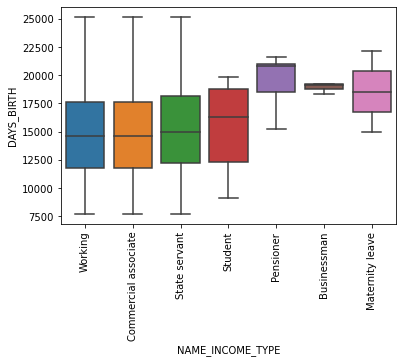

DAYS_BIRTH vs NAME_EDUCATION_TYPE


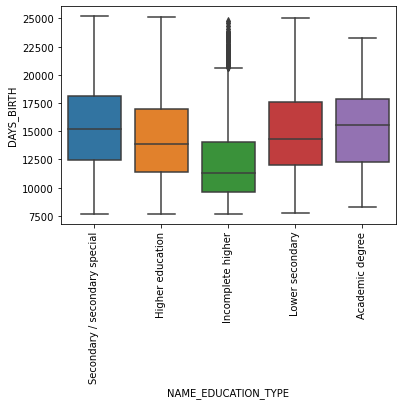

DAYS_BIRTH vs NAME_FAMILY_STATUS


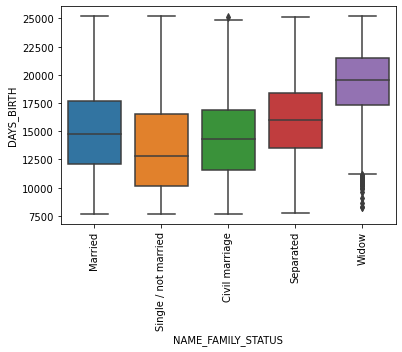

DAYS_BIRTH vs NAME_HOUSING_TYPE


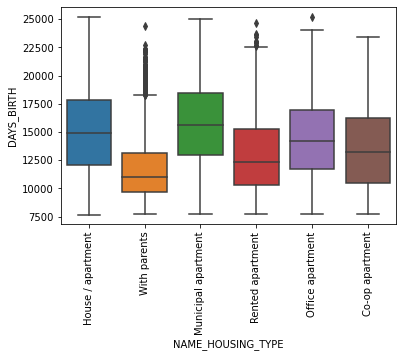

DAYS_BIRTH vs OCCUPATION_TYPE


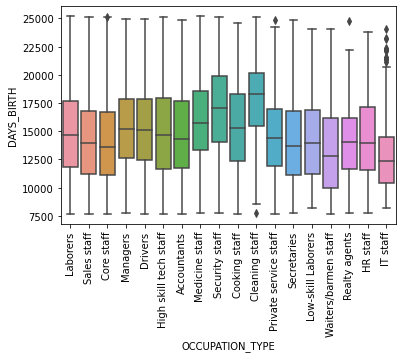

DAYS_BIRTH vs WEEKDAY_APPR_PROCESS_START


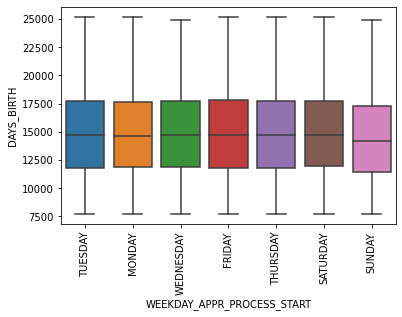

DAYS_BIRTH vs ORGANIZATION_TYPE


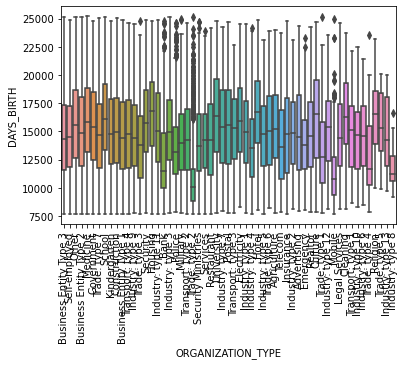

DAYS_EMPLOYED vs NAME_TYPE_SUITE


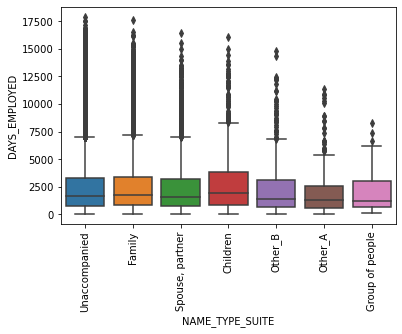

DAYS_EMPLOYED vs NAME_INCOME_TYPE


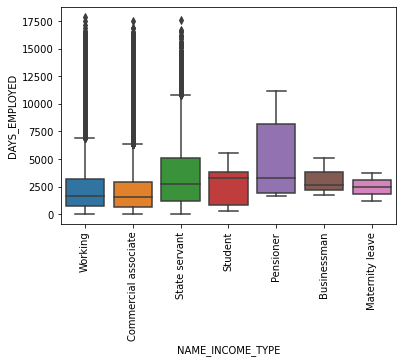

DAYS_EMPLOYED vs NAME_EDUCATION_TYPE


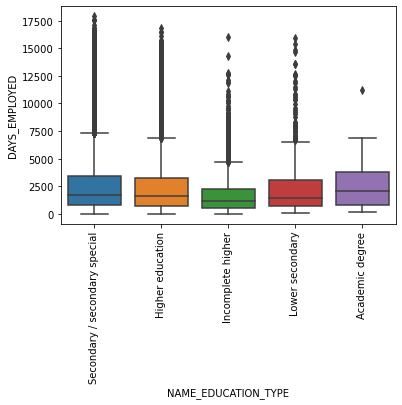

DAYS_EMPLOYED vs NAME_FAMILY_STATUS


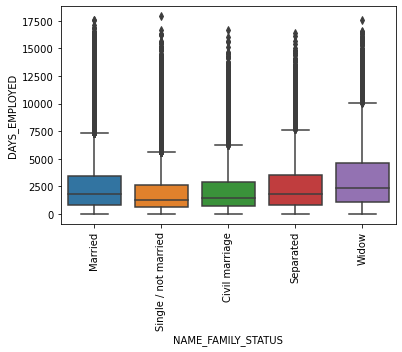

DAYS_EMPLOYED vs NAME_HOUSING_TYPE


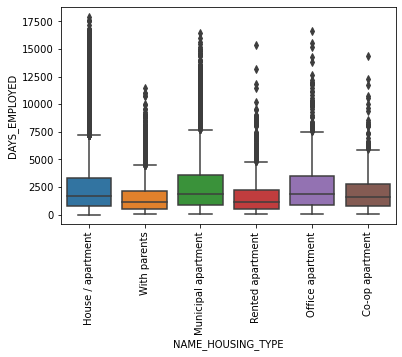

DAYS_EMPLOYED vs OCCUPATION_TYPE


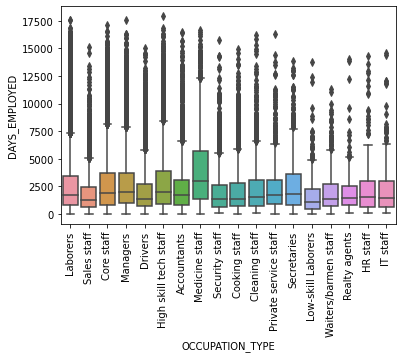

DAYS_EMPLOYED vs WEEKDAY_APPR_PROCESS_START


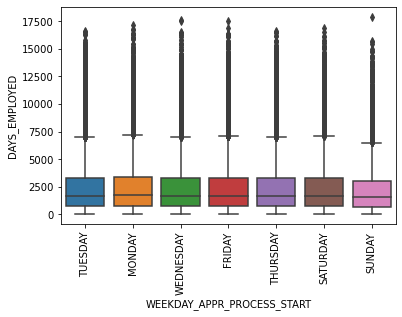

DAYS_EMPLOYED vs ORGANIZATION_TYPE


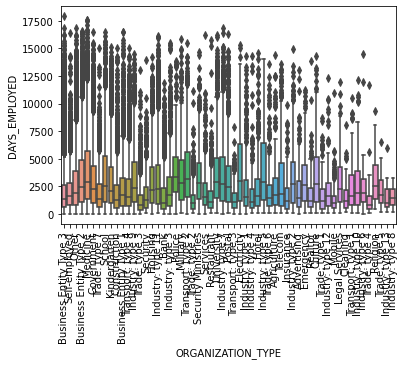

DAYS_ID_PUBLISH vs NAME_TYPE_SUITE


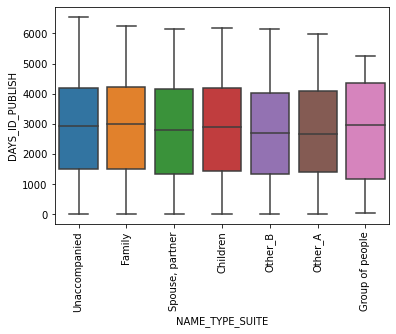

DAYS_ID_PUBLISH vs NAME_INCOME_TYPE


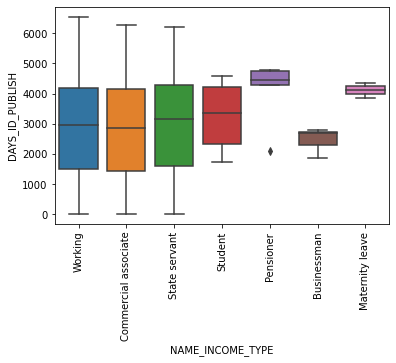

DAYS_ID_PUBLISH vs NAME_EDUCATION_TYPE


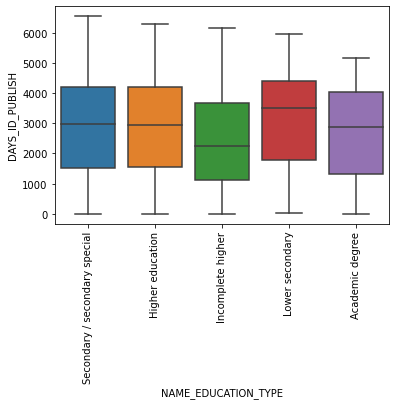

DAYS_ID_PUBLISH vs NAME_FAMILY_STATUS


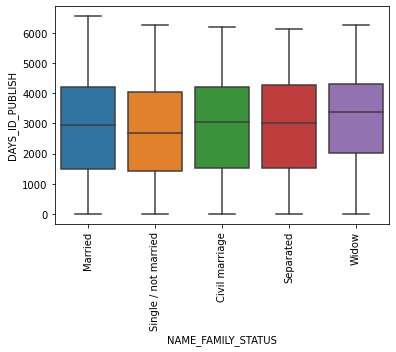

DAYS_ID_PUBLISH vs NAME_HOUSING_TYPE


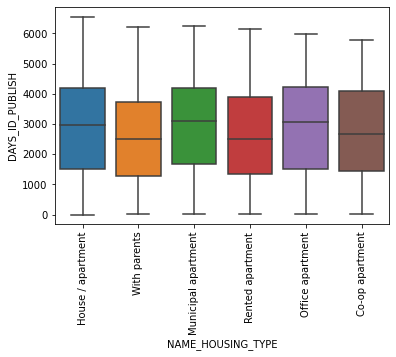

DAYS_ID_PUBLISH vs OCCUPATION_TYPE


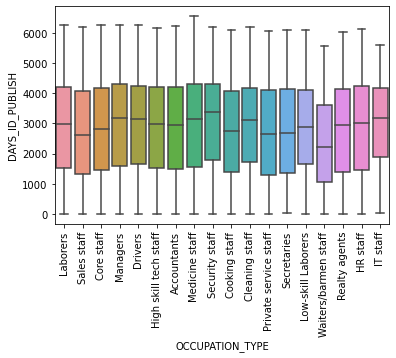

DAYS_ID_PUBLISH vs WEEKDAY_APPR_PROCESS_START


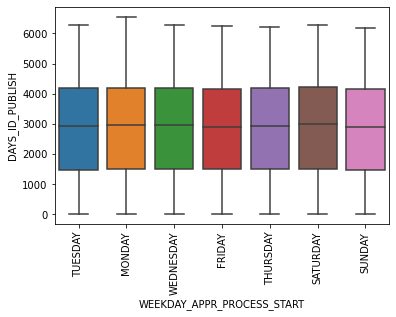

DAYS_ID_PUBLISH vs ORGANIZATION_TYPE


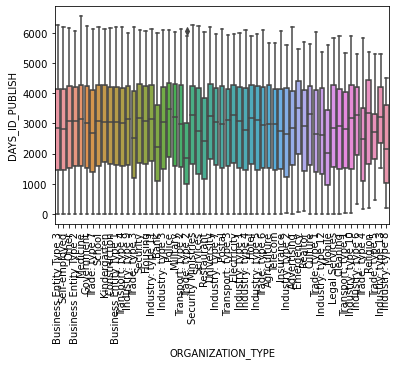

CNT_FAM_MEMBERS vs NAME_TYPE_SUITE


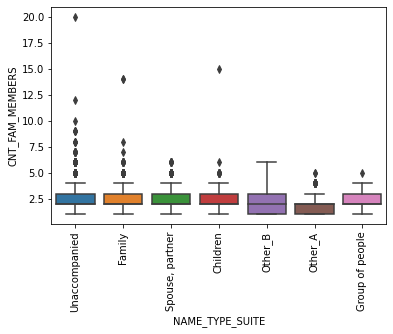

CNT_FAM_MEMBERS vs NAME_INCOME_TYPE


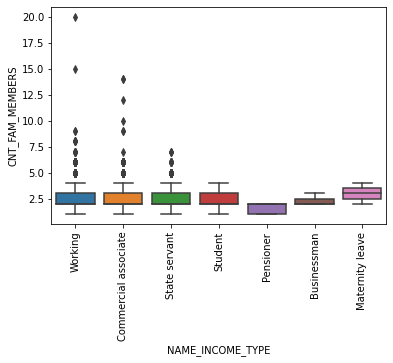

CNT_FAM_MEMBERS vs NAME_EDUCATION_TYPE


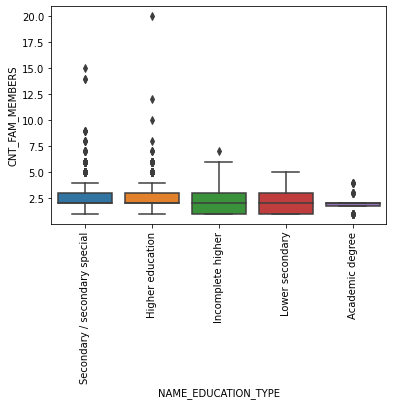

CNT_FAM_MEMBERS vs NAME_FAMILY_STATUS


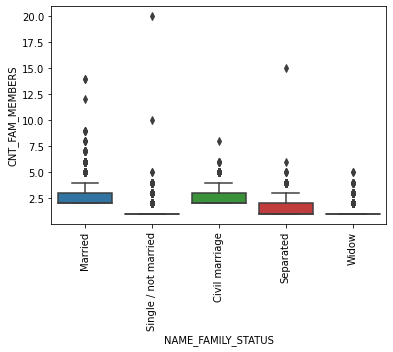

CNT_FAM_MEMBERS vs NAME_HOUSING_TYPE


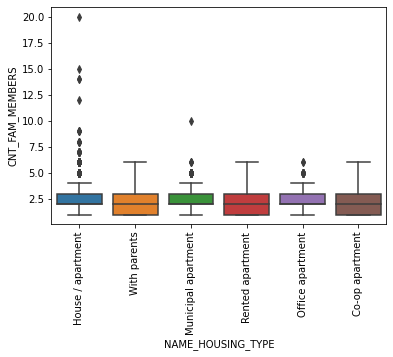

CNT_FAM_MEMBERS vs OCCUPATION_TYPE


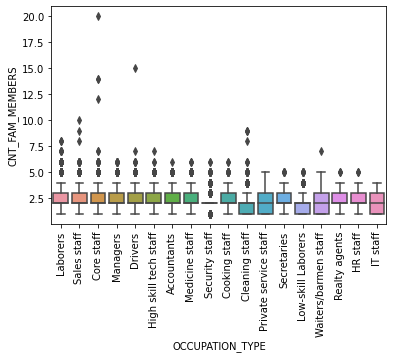

CNT_FAM_MEMBERS vs WEEKDAY_APPR_PROCESS_START


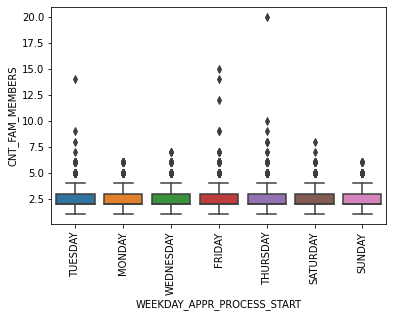

CNT_FAM_MEMBERS vs ORGANIZATION_TYPE


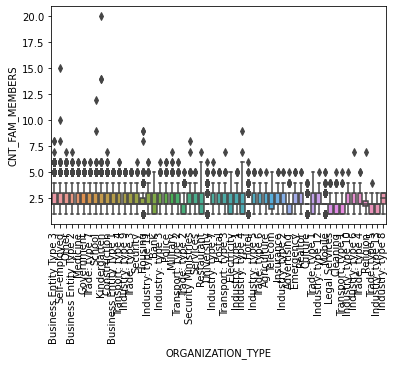

HOUR_APPR_PROCESS_START vs NAME_TYPE_SUITE


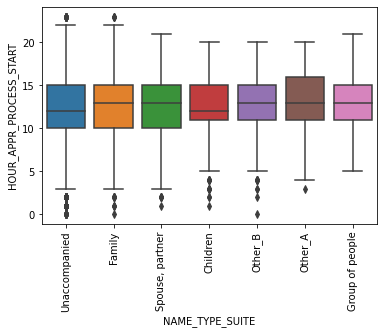

HOUR_APPR_PROCESS_START vs NAME_INCOME_TYPE


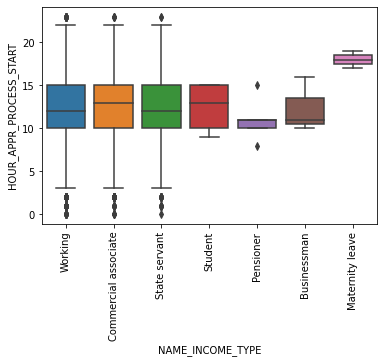

HOUR_APPR_PROCESS_START vs NAME_EDUCATION_TYPE


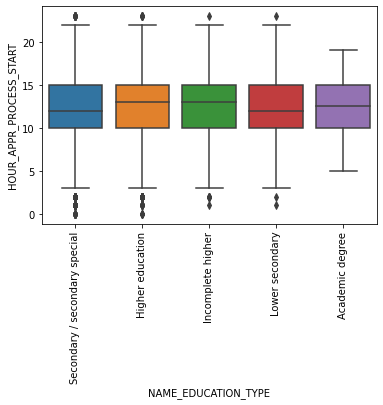

HOUR_APPR_PROCESS_START vs NAME_FAMILY_STATUS


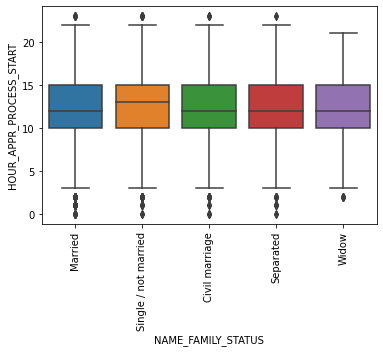

HOUR_APPR_PROCESS_START vs NAME_HOUSING_TYPE


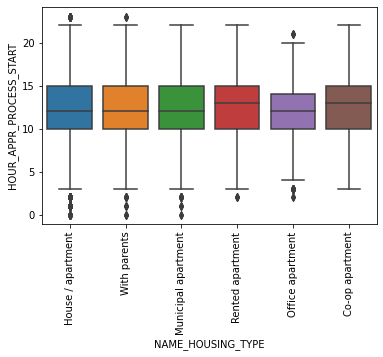

HOUR_APPR_PROCESS_START vs OCCUPATION_TYPE


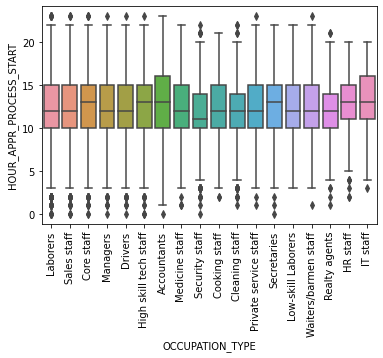

HOUR_APPR_PROCESS_START vs WEEKDAY_APPR_PROCESS_START


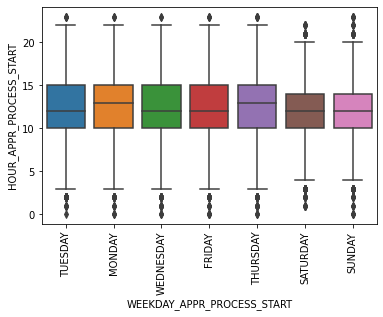

HOUR_APPR_PROCESS_START vs ORGANIZATION_TYPE


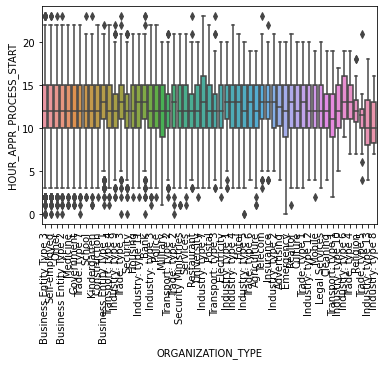

EXT_SOURCE_2 vs NAME_TYPE_SUITE


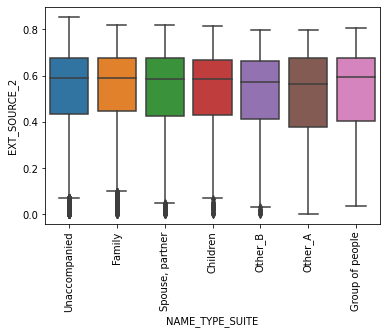

EXT_SOURCE_2 vs NAME_INCOME_TYPE


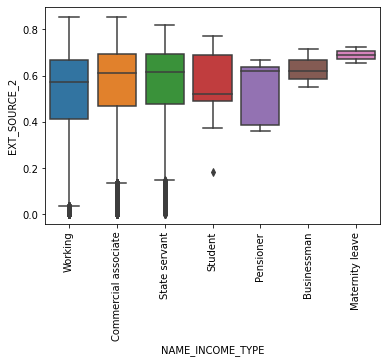

EXT_SOURCE_2 vs NAME_EDUCATION_TYPE


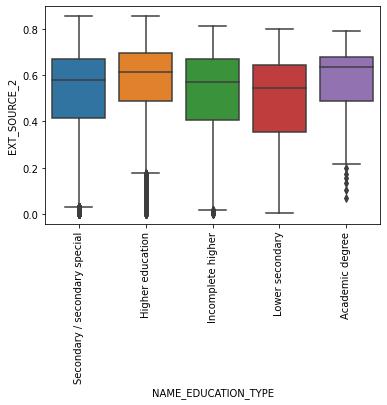

EXT_SOURCE_2 vs NAME_FAMILY_STATUS


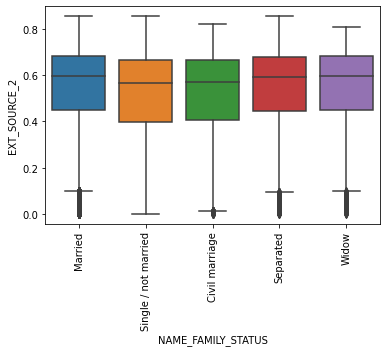

EXT_SOURCE_2 vs NAME_HOUSING_TYPE


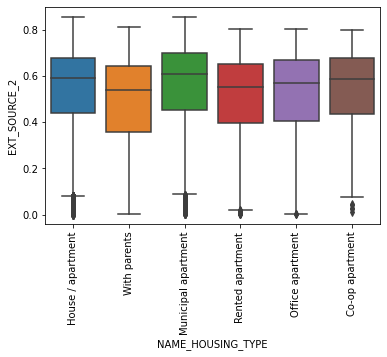

EXT_SOURCE_2 vs OCCUPATION_TYPE


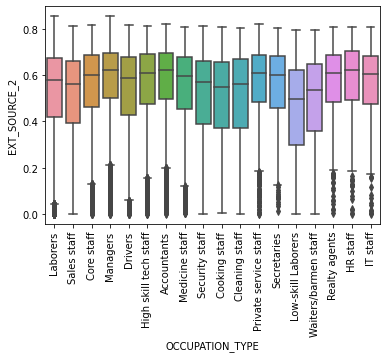

EXT_SOURCE_2 vs WEEKDAY_APPR_PROCESS_START


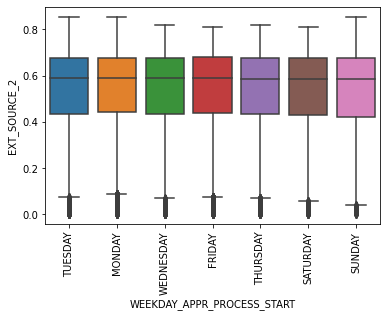

EXT_SOURCE_2 vs ORGANIZATION_TYPE


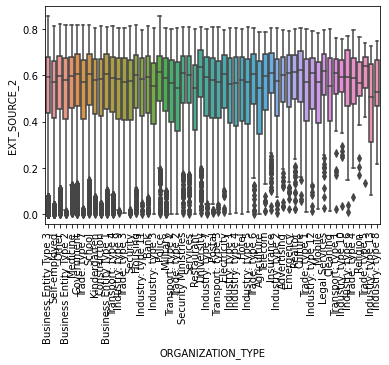

EXT_SOURCE_3 vs NAME_TYPE_SUITE


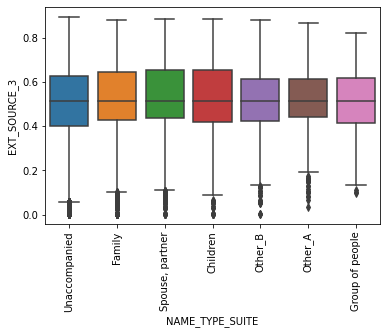

EXT_SOURCE_3 vs NAME_INCOME_TYPE


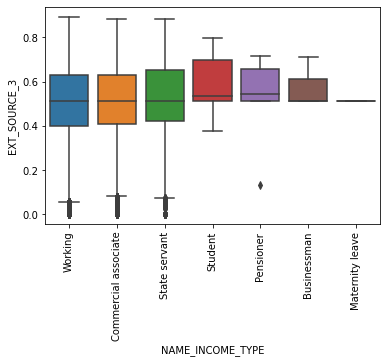

EXT_SOURCE_3 vs NAME_EDUCATION_TYPE


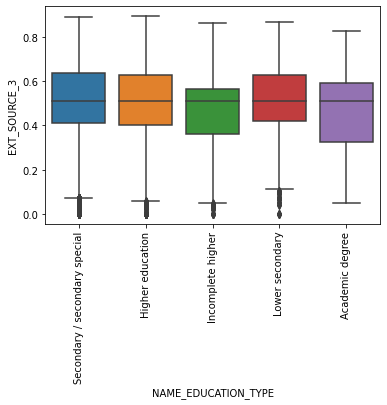

EXT_SOURCE_3 vs NAME_FAMILY_STATUS


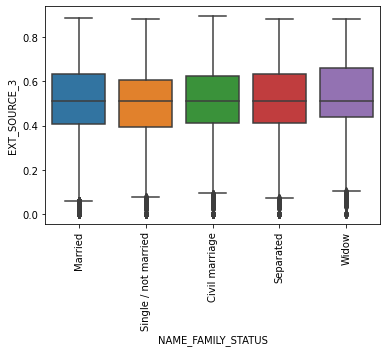

EXT_SOURCE_3 vs NAME_HOUSING_TYPE


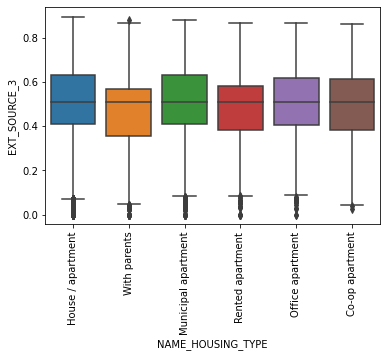

EXT_SOURCE_3 vs OCCUPATION_TYPE


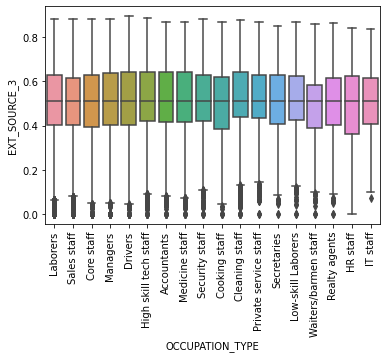

EXT_SOURCE_3 vs WEEKDAY_APPR_PROCESS_START


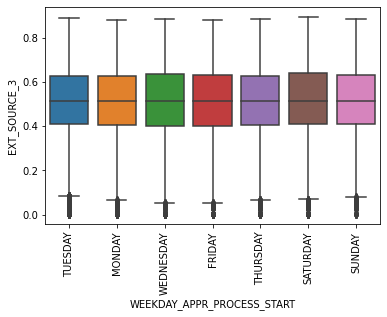

EXT_SOURCE_3 vs ORGANIZATION_TYPE


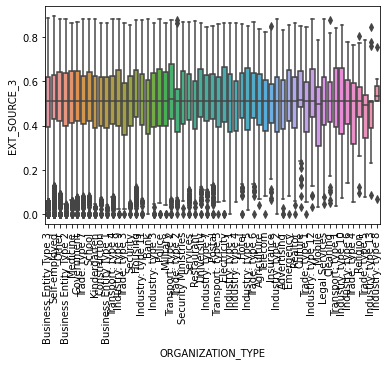

FLOORSMAX_MEDI vs NAME_TYPE_SUITE


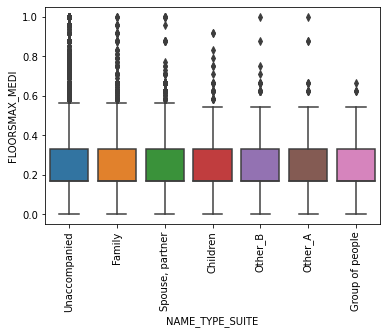

FLOORSMAX_MEDI vs NAME_INCOME_TYPE


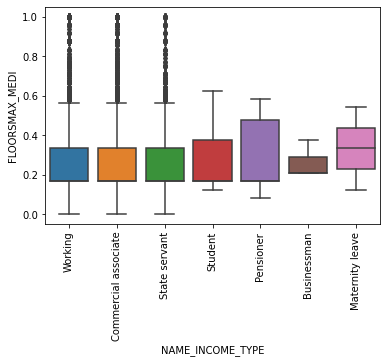

FLOORSMAX_MEDI vs NAME_EDUCATION_TYPE


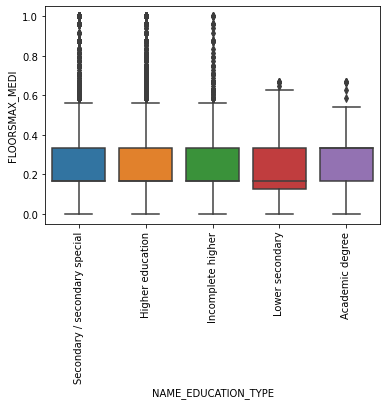

FLOORSMAX_MEDI vs NAME_FAMILY_STATUS


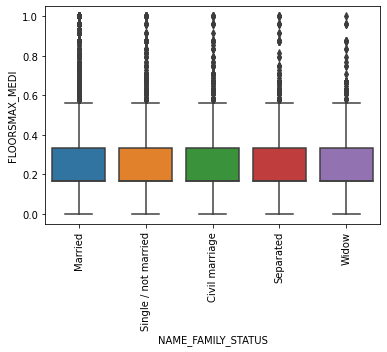

FLOORSMAX_MEDI vs NAME_HOUSING_TYPE


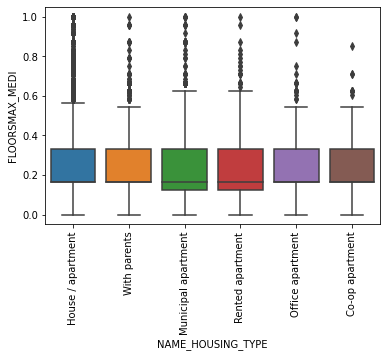

FLOORSMAX_MEDI vs OCCUPATION_TYPE


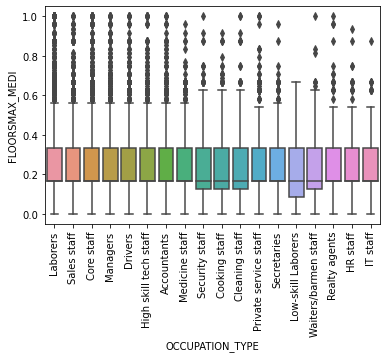

FLOORSMAX_MEDI vs WEEKDAY_APPR_PROCESS_START


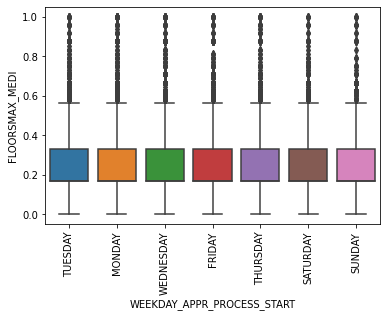

FLOORSMAX_MEDI vs ORGANIZATION_TYPE


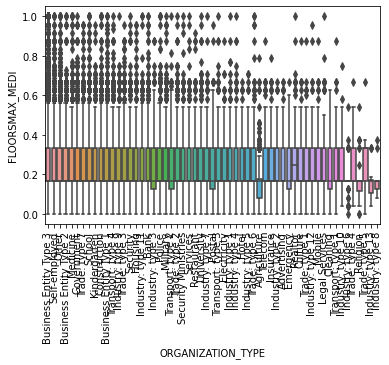

In [50]:
#plot pox plot of features 
for j in range(len(cont_cols)):
    for i in range(len(cat_cols)):
        print(f'{cont_cols[j]} vs {cat_cols[i]}')
        cont_cat_boxplot(cat_cols[i], cont_cols[j])

Notice: For this analysis we will remove the redundant feature that is correlated to another existing one <br>  
We can notice that NO features are significantly correlated

## 3.5 Multiple Categorical Vs Categorical
For this analysis we will use **chi2 Test** to calculate the correlation between the variables

In [51]:
# select multiple categorical Features
cat_cols = clean_dataset.columns[(clean_dataset.dtypes == 'object')]
cat_cols =np.append(cat_cols.values,binary_to_keep)
cat_cols

array(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'TARGET',
       'CODE_GENDER'], dtype=object)

In [52]:
# convert categorical to numerical values
to_encoded = clean_dataset.copy()
label = preprocessing.LabelEncoder()
encoded_data = pd.DataFrame(to_encoded)
for col in cat_cols:
    encoded_data[col] = label.fit_transform(to_encoded[col])


In [53]:
encoded_data.head()

TARGET  CODE_GENDER  AMT_INCOME_TOTAL  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0        1            1          202500.0                6                 6   
1        0            0          270000.0                1                 4   
12       0            0           67500.0                6                 6   
13       0            1          225000.0                6                 6   
14       0            0          189000.0                6                 6   

    NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  \
0                     4                   3                  1        9461   
1                     1                   1                  1       16765   
12                    4                   1                  1       13439   
13                    4                   1                  1       14086   
14                    4                   1                  1       14583   

    DAYS_EMPLOYED  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             637             2120                8              1.0   
1            1188              291                3              2.0   
12           2717             3227                8              2.0   
13           3028             4911                4              3.0   
14            203             2056                8              2.0   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  \
0                            6                       10                  5   
1                            1                       11                 39   
12                           0                       10                  4   
13                           4                       13                 42   
14                           1                        9                 53   

    EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_MEDI  
0       0.262949      0.139376          0.0833  
1       0.622246      0.510853          0.2917  
12      0.715042      0.176653          0.1667  
13      0.566907      0.770087          0.3333  
14      0.642656      0.510853          0.6667

In [54]:
# calculate cramer v Value
def calc_cramerV(col1, col2):
    cross_table = pd.crosstab(col1, col2)
    chi2 = chi2_contingency(cross_table)[0]
    n = cross_table.sum().sum()
    phi2 = chi2/n
    r,k = cross_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
#correlation matrix 
rows = []
for i in range(len(cat_cols)):
    cols = []
    for j in range(len(cat_cols)):
        V = calc_cramerV(encoded_data[cat_cols[i]],encoded_data[cat_cols[j]])
        cols.append(V)
    rows.append(cols)

In [55]:
corr_matrix = pd.DataFrame(data = rows, index= cat_cols,columns = cat_cols )

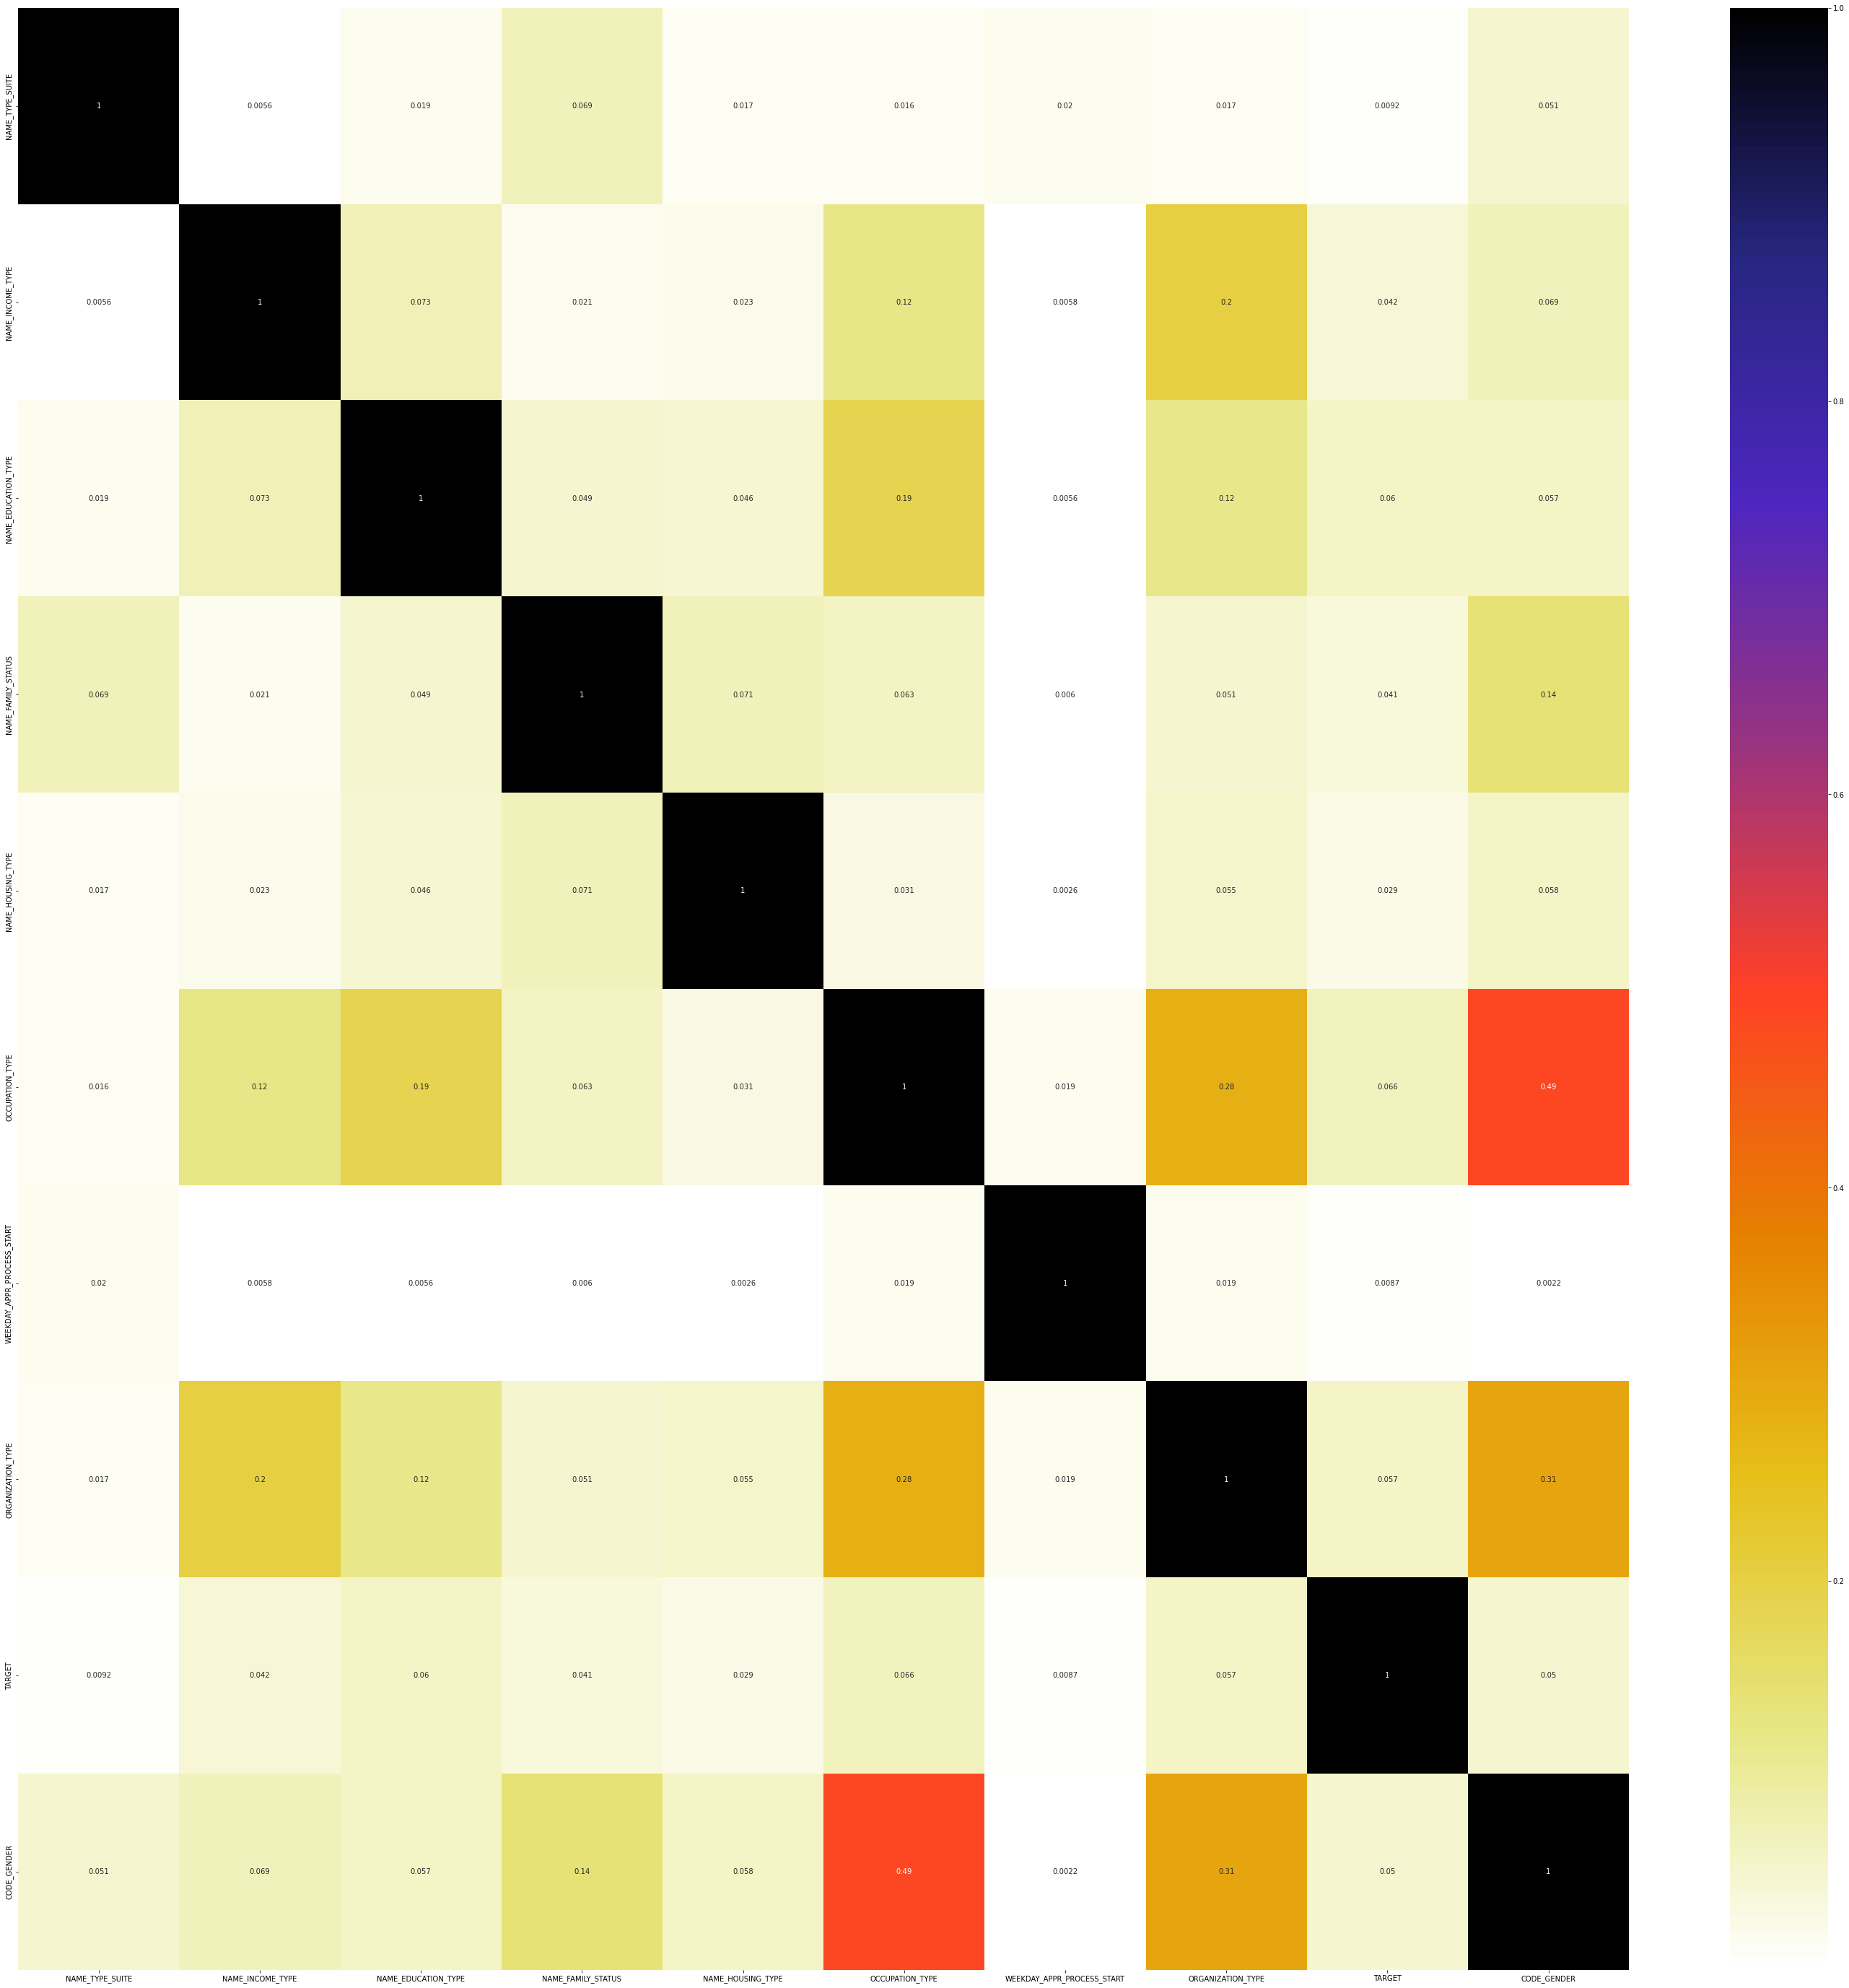

In [56]:
#plot heatmap of pearson'r correlation matrix 
plt.figure(figsize=(50,50))
_ = sns.heatmap(data = corr_matrix ,cmap=plt.cm.CMRmap_r, annot= True)

From Matrix above we can notice that they are weakly correlated to ouput. and aslo they are very weakly correlated to each other. <br> 
we will keep features correlated to ouput with cramer'V > 0.5

In [57]:
corr_matrix

NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
NAME_TYPE_SUITE                    1.000000          0.005618   
NAME_INCOME_TYPE                   0.005618          1.000000   
NAME_EDUCATION_TYPE                0.018906          0.073077   
NAME_FAMILY_STATUS                 0.068656          0.020935   
NAME_HOUSING_TYPE                  0.016717          0.023325   
OCCUPATION_TYPE                    0.016042          0.121884   
WEEKDAY_APPR_PROCESS_START         0.019682          0.005782   
ORGANIZATION_TYPE                  0.017333          0.201568   
TARGET                             0.009162          0.041827   
CODE_GENDER                        0.051317          0.068997   

                            NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
NAME_TYPE_SUITE                        0.018906            0.068656   
NAME_INCOME_TYPE                       0.073077            0.020935   
NAME_EDUCATION_TYPE                    1.000000            0.048995   
NAME_FAMILY_STATUS                     0.048995            1.000000   
NAME_HOUSING_TYPE                      0.046394            0.071381   
OCCUPATION_TYPE                        0.188883            0.062511   
WEEKDAY_APPR_PROCESS_START             0.005622            0.005959   
ORGANIZATION_TYPE                      0.115908            0.051494   
TARGET                                 0.059673            0.040692   
CODE_GENDER                            0.056744            0.141862   

                            NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
NAME_TYPE_SUITE                      0.016717         0.016042   
NAME_INCOME_TYPE                     0.023325         0.121884   
NAME_EDUCATION_TYPE                  0.046394         0.188883   
NAME_FAMILY_STATUS                   0.071381         0.062511   
NAME_HOUSING_TYPE                    1.000000         0.031076   
OCCUPATION_TYPE                      0.031076         1.000000   
WEEKDAY_APPR_PROCESS_START           0.002600         0.018664   
ORGANIZATION_TYPE                    0.054711         0.282893   
TARGET                               0.028932         0.065854   
CODE_GENDER                          0.058441         0.485899   

                            WEEKDAY_APPR_PROCESS_START  ORGANIZATION_TYPE  \
NAME_TYPE_SUITE                               0.019682           0.017333   
NAME_INCOME_TYPE                              0.005782           0.201568   
NAME_EDUCATION_TYPE                           0.005622           0.115908   
NAME_FAMILY_STATUS                            0.005959           0.051494   
NAME_HOUSING_TYPE                             0.002600           0.054711   
OCCUPATION_TYPE                               0.018664           0.282893   
WEEKDAY_APPR_PROCESS_START                    1.000000           0.019423   
ORGANIZATION_TYPE                             0.019423           1.000000   
TARGET                                        0.008655           0.057475   
CODE_GENDER                                   0.002166           0.306180   

                              TARGET  CODE_GENDER  
NAME_TYPE_SUITE             0.009162     0.051317  
NAME_INCOME_TYPE            0.041827     0.068997  
NAME_EDUCATION_TYPE         0.059673     0.056744  
NAME_FAMILY_STATUS          0.040692     0.141862  
NAME_HOUSING_TYPE           0.028932     0.058441  
OCCUPATION_TYPE             0.065854     0.485899  
WEEKDAY_APPR_PROCESS_START  0.008655     0.002166  
ORGANIZATION_TYPE           0.057475     0.306180  
TARGET                      0.999941     0.050180  
CODE_GENDER                 0.050180     0.999982

In [58]:
# correlated with target 
clean_dataset.drop(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 
                    'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START'], axis = 1, inplace= True)
# total_features = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CODE_GENDER','DAYS_EMPLOYED','AMT_INCOME_TOTAL',
#                  'CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']
# # ,

In [59]:
clean_dataset.head()
# f_sel_data = f_sel_data[total_features]
# f_sel_data.head()

TARGET  CODE_GENDER  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0        1            1          202500.0  Secondary / secondary special   
1        0            0          270000.0               Higher education   
12       0            0           67500.0  Secondary / secondary special   
13       0            1          225000.0  Secondary / secondary special   
14       0            0          189000.0  Secondary / secondary special   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0         9461            637             2120        Laborers   
1        16765           1188              291      Core staff   
12       13439           2717             3227        Laborers   
13       14086           3028             4911         Drivers   
14       14583            203             2056        Laborers   

    CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0               1.0                       10  Business Entity Type 3   
1               2.0                       11                  School   
12              2.0                       10  Business Entity Type 2   
13              3.0                       13           Self-employed   
14              2.0                        9       Transport: type 2   

    EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_MEDI  
0       0.262949      0.139376          0.0833  
1       0.622246      0.510853          0.2917  
12      0.715042      0.176653          0.1667  
13      0.566907      0.770087          0.3333  
14      0.642656      0.510853          0.6667

In [60]:
f_sel_data = clean_dataset.copy()

# Univariate Analaysis (Understand the Variables) 

### Distribution of applications

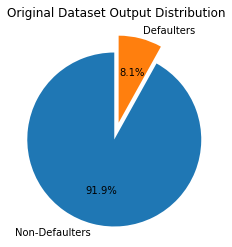

In [61]:

labels = [ 'Non-Defaulters', 'Defaulters']
plt.title("Original Dataset Output Distribution")
_ = plt.pie(org_dataset.TARGET.value_counts(),labels=labels, explode= (0.1,0.1), autopct= "%1.1f%%", startangle=90)

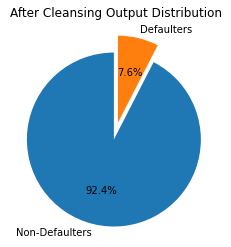

In [62]:
labels = [ 'Non-Defaulters', 'Defaulters']
plt.title("After Cleansing Output Distribution")
_ = plt.pie(f_sel_data.TARGET.value_counts(),labels=labels, explode= (0.1,0.1), autopct= "%1.1f%%", startangle=90)

Insight: that our dataset has 92.4% Non-Defaulters and 7.6% Defaulters so our dataset is <b>Impalanced<b>

### Female Vs Male applicants 

In [63]:
# CODE_GENDER => 1 -> Male
#                0 -> Female

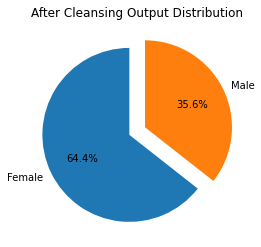

In [64]:
labels = [ 'Female', 'Male']
plt.title("After Cleansing Output Distribution")
_ = plt.pie(f_sel_data.CODE_GENDER.value_counts(),labels=labels, explode= (0.1,0.1), autopct= "%1.1f%%", startangle=90)

Insight: Female Client are so much more than Male Clients 

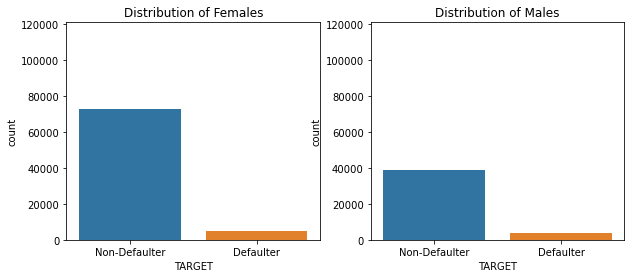

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(4)
sns.countplot(x = 'TARGET', data= f_sel_data[f_sel_data.CODE_GENDER == 0], ax= ax1)
ax1.set_title('Distribution of Females')
ax1.set_ylim(0, len(f_sel_data))
ax1.set_xticklabels(['Non-Defaulter', 'Defaulter'])

sns.countplot(x = 'TARGET', data= f_sel_data[f_sel_data.CODE_GENDER == 1], ax= ax2)
ax2.set_title('Distribution of Males')
ax2.set_ylim(0, len(f_sel_data))
_ = ax2.set_xticklabels(['Non-Defaulter', 'Defaulter'])

Insight:The number of Non-defalters for men is less than the number of defaulters for women
To get better insight we better calculate percentage

Text(0.5, 1.0, 'Percentage of Females')

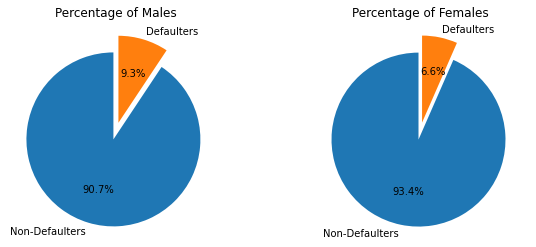

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(4)
labels = [ 'Non-Defaulters', 'Defaulters']
ax1.pie(f_sel_data[f_sel_data.CODE_GENDER == 1].TARGET.value_counts(),labels=labels, explode= (0.1,0.1), autopct= "%1.1f%%", startangle=90)
ax1.set_title('Percentage of Males')

ax2.pie(f_sel_data[f_sel_data.CODE_GENDER == 0].TARGET.value_counts(),labels=labels, explode= (0.1,0.1), autopct= "%1.1f%%", startangle=90)
ax2.set_title('Percentage of Females')


Insight: Now we can see that the percentage of Non-Defaulted females is larger than men 

###  Family members for females and males 

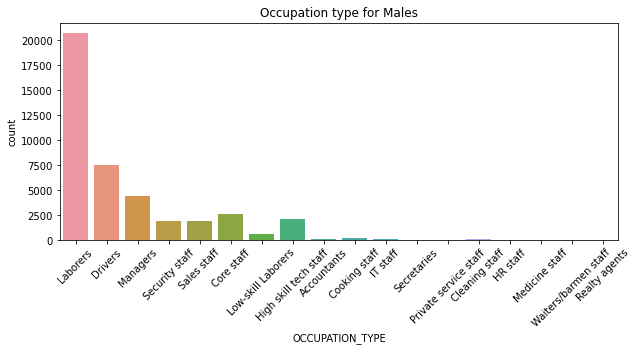

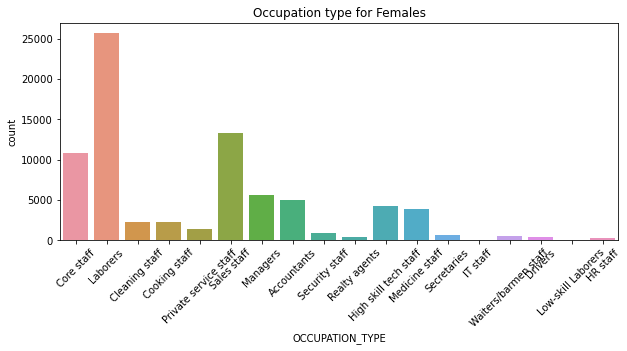

In [67]:
plt.figure(figsize=(10,4))
plt.xticks(rotation = 45)
plt.title("Occupation type for Males")
sns.countplot(x = 'OCCUPATION_TYPE', data= f_sel_data[f_sel_data.CODE_GENDER == 1])
plt.figure(figsize=(10,4))
plt.xticks(rotation = 45)
plt.title("Occupation type for Females")
_ =sns.countplot(x = 'OCCUPATION_TYPE', data= f_sel_data[f_sel_data.CODE_GENDER == 0])

Insight: we can see that most people who want a credit are laborers<br> 

In [68]:
X = f_sel_data.copy()

In [69]:
X.to_csv("selected_dataset.csv", index=False)

# Learning Model

In [149]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import  sklearn.svm as svm
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
np.random.seed(50)

In [150]:
# from google.colab import drive
# drive.mount('/content/drive')

### Encoding Categorial Features

In [151]:
X_df = pd.read_csv("selected_dataset.csv")
X_df.head()

TARGET  CODE_GENDER  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0       1            1          202500.0  Secondary / secondary special   
1       0            0          270000.0               Higher education   
2       0            0           67500.0  Secondary / secondary special   
3       0            1          225000.0  Secondary / secondary special   
4       0            0          189000.0  Secondary / secondary special   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        9461            637             2120        Laborers   
1       16765           1188              291      Core staff   
2       13439           2717             3227        Laborers   
3       14086           3028             4911         Drivers   
4       14583            203             2056        Laborers   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0              1.0                       10  Business Entity Type 3   
1              2.0                       11                  School   
2              2.0                       10  Business Entity Type 2   
3              3.0                       13           Self-employed   
4              2.0                        9       Transport: type 2   

   EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_MEDI  
0      0.262949      0.139376          0.0833  
1      0.622246      0.510853          0.2917  
2      0.715042      0.176653          0.1667  
3      0.566907      0.770087          0.3333  
4      0.642656      0.510853          0.6667

In [152]:
def encode_data(X):
    Y = X.TARGET
    X.drop(['TARGET'] , axis = 1, inplace = True)
    num_cols = ['DAYS_BIRTH','FLOORSMAX_MEDI','HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_EMPLOYED','AMT_INCOME_TOTAL']
    mu = X[num_cols].mean(axis = 0)
    X[num_cols] = X[num_cols] - mu
    X[num_cols] /= X[num_cols].max(axis = 0)
    encoder = OneHotEncoder(drop='if_binary', sparse=True)
    cat_cols = X.columns[X.dtypes == 'object']
    encoded_cols = encoder.fit_transform(X[cat_cols])
    encoded_X = X.drop(cat_cols, axis = 1)
    encoded_X = np.append( encoded_cols.toarray(), encoded_X.to_numpy(), axis= 1)
    return encoded_X, Y.to_numpy()



In [153]:
def separate_test(X, Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,stratify = Y)
  return X_train, y_train, X_test, y_test

In [154]:
# Normalize continous data
encoded_X, encoded_Y = encode_data(X_df)
encoded_X /= (abs(encoded_X)).max(axis = 0)

In [155]:
encoded_X.shape

(121091, 90)

In [156]:
arr = np.append(encoded_X, encoded_Y.reshape(len(encoded_Y),1), axis=1)
np.savetxt('all_data.csv',arr, delimiter=',')

### Helpers 

In [157]:
def svm_clf(X_train, X_valid, y_train, y_valid,kernel , degree, nu = None,c = 1.0, plot = True):
    #fit model
    clf = None 
    if nu == None: 
        clf = svm.SVC(kernel = kernel, gamma='auto',C = c, degree = degree)
    else: 
        clf = svm.Nu_SVC(gamma='auto')
        
    clf.fit(X_train, y_train)
    
    #predict train set
    train_pred = clf.predict(X_train)
    valid_pred = clf.predict(X_valid)
    if plot: 
        print(f'Training Accuracy: {(train_pred == y_train).mean()*100:.2f} , Test Accuracy: {(valid_pred == y_valid).mean()*100:.2f}')
        plot_confusion(y_train, train_pred, y_valid, valid_pred)
    return clf, (train_pred == y_train).mean(),(valid_pred == y_valid).mean()*100, f1_score(y_valid, valid_pred)

def plot_confusion(y_train, train_pred, y_valid, valid_pred):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    
    ax1.set_title("Training Confuction Matrix")
    ax2.set_title("Testing Confuction Matrix")
    plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9, top=0.9, wspace=0.5, hspace=0.4)
    
    cm = confusion_matrix(y_train, train_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax1)
     
    # predict test set 
   
    cm = confusion_matrix(y_valid, valid_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax2)

def plot_confusion(y_true, y_pred):    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

    
def over_sample(X, Y, test_size = 0.2):
    ros = RandomOverSampler()
    return ros.fit_resample(X, Y)
    
    
def under_sample(X,Y, test_size = 0.2): 
    rus = RandomUnderSampler()
    return rus.fit_resample(X,Y)
    

def dt_clf(X_train, X_valid, y_train, y_valid,max_depth = 34, plot = True):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    valid_pred = dt.predict(X_valid)
    if plot: 
        print(f"Max-Depth is: {dt.tree_.max_depth}")
        print(f"DT: Train Acc: {(train_pred == y_train).mean()*100:.2f} , Test Acc: {(valid_pred == y_valid).mean()*100:.2f}")
        plot_confusion(y_train, train_pred, y_test, test_pred)
    return dt, (train_pred == y_train).mean()*100,(valid_pred == y_valid).mean()*100,f1_score(y_valid, valid_pred)

def knn_clf(X_train, X_valid, y_train, y_valid,k = 5 ,plot = True):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    valid_pred = clf.predict(X_valid)
    if plot:
        print(f'{int(np.sqrt(len(X_train)))}-NN Clf -> Train Accuracy: {(train_pred == y_train).mean()*100:.2f},  Test Accuracy: {(valid_pred == y_valid).mean()*100:.2f}')
        plot_confusion(y_train, train_pred, y_valid, valid_pred)
    return clf, (train_pred == y_train).mean()*100,(valid_pred == y_valid).mean()*100,f1_score(y_valid, valid_pred)

def RF_clf(X_train, X_valid, y_train, y_valid, n_esimators,plot = True):
    rf = RandomForestClassifier(n_estimators= n_esimators)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    valid_pred = rf.predict(X_valid)
    if plot: 
        print(f"DT: Train Acc: {(train_pred == y_train).mean()*100:.2f} , Test Acc: {(valid_pred == y_valid).mean()*100:.2f}")
        plot_confusion(y_train, train_pred, y_valid,  valid_pred)
    return rf, (train_pred == y_train).mean()*100,(valid_pred == y_valid).mean()*100,f1_score(y_valid, valid_pred)


def tune_svm(X_train, X_valid, y_train, y_valid):
    kernel = ['poly', 'rbf', 'sigmoid']
    degree = np.arange(1, 4, 1)
    C = np.arange(1, 100, 20)
    best_model = (None, None, None)
    max_acc = 0
    for kr in kernel:
        if kr == 'poly':
          for deg in degree:
              print(kr,deg)
              for c in C:
                  _, tacc, vacc,f1 = svm_clf(X_train, X_valid, y_train, y_valid, kernel = kr,
                                          degree = deg,c = c, plot = False)
                  if f1 > max_acc:
                      max_acc = f1
                      best_model = (kr, deg, c)
                  if tacc == 100:
                      break
        else:
          print(kr)
          for c in C:
              _, tacc, vacc, f1 = svm_clf(X_train, X_valid, y_train, y_valid, kernel = kr,
                                      degree = deg,c = c, plot = False)
              if f1 > max_acc:
                  max_acc = f1
                  best_model = (kr, deg, c)
              if tacc == 100:
                  break
    return best_model

def tune_knn( X_train, X_valid, y_train, y_valid):
    train_acc = [];  valid_acc = []
    best_k = None
    max_vacc = 0
    for k in np.arange(5, int(np.sqrt(len(X_train))), 10):
        print(f"K: {k}")
        _, tracc, vacc, f1  = knn_clf(X_train, X_valid, y_train, y_valid,k , plot = False)
        # print("done")
        train_acc.extend([tracc])
        valid_acc.extend([vacc])
        if f1 > max_vacc:
            max_vacc = f1
            best_k = k
        if tracc == 100:
            break
            
    plt.figure()
    plt.title("Accuracy Graph vs K value")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.plot(np.arange(5, int(np.sqrt(len(X_train))), 10), train_acc)
    plt.plot(np.arange(5, int(np.sqrt(len(X_train))), 10), valid_acc)
    return best_k

def tune_DT(X_train, X_valid, y_train, y_valid):
    train_acc = [];  valid_acc = []
    best_depth = None
    max_vacc = 0
    for i in np.arange(3,34,1):
        print(f"depth: {i}")
        _ , tracc, vacc, f1 = dt_clf(X_train, X_valid, y_train, y_valid, max_depth = i, plot= False)
        train_acc.extend([tracc])
        valid_acc.extend([vacc])
        if f1 > max_vacc:
            max_vacc = f1
            best_depth = i
        if tracc == 100:
            break
    plt.figure()
    plt.title("Accuracy Graph vs Max-Depth")
    plt.xlabel("Max-Depth")
    plt.ylabel("Accuracy")
    plt.plot(np.arange(3,len(train_acc)+3,1), train_acc)
    plt.plot(np.arange(3,len(train_acc)+3,1), valid_acc)
    return best_depth

def tune_RF(X_train, X_valid, y_train, y_valid):
  list_train_acc = []
  list_valid_acc = []
  best_valid_acc = 0
  best_n = None
  for n in np.arange(2,100,5):
      print(f"N: {n}")
      _, tacc, vacc, f1 = RF_clf(X_train, X_valid, y_train, y_valid, n_esimators = n, plot= False)
      list_train_acc.extend([tacc])
      list_valid_acc.extend([vacc])
      if tacc == 100:
          break
      if f1  > best_valid_acc:
          best_valid_acc = f1
          best_n = n
          
  plt.figure()
  plt.title("Accuracy Vs N_Esimators")
  plt.plot(range(len(list_train_acc)),list_train_acc)
  plt.plot(range(len(list_valid_acc)),list_valid_acc)
  return best_n

def tune_LR(X_train, X_valid, y_train, y_valid):
    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    solvers =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    epochs = [1000, 10000, 100000]
    best_model = None
    best_f1 = 0
    for solver in solvers:
        for c in C:
            for epo in epochs:
                print(f'solver= {solver}, c = {c}, epochs = {epo}')
                lReg = LogisticRegression(C= c, max_iter=epo, solver=solver)
                lr_model = lReg.fit(X_train, y_train)
                y_pred = lr_model.predict(X_valid)
                f1 = f1_score(y_valid, y_pred)
                if f1 > best_f1:
                    best_model = (solver, c, epo)
                    best_f1 = f1
    return best_model

In [158]:
X , Y , X_test, y_test = separate_test(encoded_X, encoded_Y)
X_imp , Y_imp , X_valid, y_valid = separate_test(X, Y)
X_us, Y_us = under_sample(X_imp, Y_imp, test_size=0.1)
X_os, Y_os = over_sample(X_imp, Y_imp, test_size=0.1)

## Save Numpy Dataset as CSV

In [159]:
test = np.append(X_test, y_test.reshape(len(y_test),1), axis=1)
np.savetxt('test.csv',test, delimiter=',')

imp_data = np.append(X_imp, Y_imp.reshape(len(Y_imp),1), axis=1)
np.savetxt('imp_data.csv',imp_data, delimiter=',')

us_data = np.append(X_us, Y_us.reshape(len(Y_us),1), axis=1)
np.savetxt('us_data.csv',us_data, delimiter=',')

os_data = np.append(X_os, Y_os.reshape(len(Y_os),1), axis=1)
np.savetxt('os_data.csv',os_data, delimiter=',')

In [160]:
t = pd.read_csv('test.csv', header=None)
(np.round(t.to_numpy(),2) == np.round(test,2)).mean()

1.0

In [166]:
# import sys
# import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def our_accuracy_score(true, predicted):
    return (true == predicted).mean()

class StochasticLReg:
    def __init__(self, lr: int, epochs: int, probability_threshold: float = 0.5, random_state = None):
        self.lr = lr # The learning rate
        self.epochs = epochs # The number of training epochs
        self.probability_threshold = probability_threshold # If the output of the sigmoid function is > probability_threshold, the prediction is considered to be positive (True)
                                                           # otherwise, the prediction is considered to be negative (False)
        self.random_state = random_state # The random state will be used set the random seed for the sake of reproducability

    def _prepare_input(self, X):
        # Here, we add a new input with value 1 to each example. It will be multipled by the bias
        return np.concatenate(([1], X), axis=0)
    
    def _prepare_target(self, y):
        # Here, we convert True to +1 and False to -1
        return np.where(y, 1, -1)

    def _initialize(self, num_weights: int, stdev: float = 0.01):
        # Here, we initialize the weights using a normally distributed random variable with a small standard deviation
        # self.w = np.random.randn(num_weights) * stdev
        self.w = np.zeros(num_weights)

    def _gradient(self, X, y):
        wx = np.dot(X,self.w)
        exp = np.exp(y * wx)
        return - ((y*X) / (1+exp))

    def _update(self, X, y):
        self.w = self.w - self.lr * self._gradient(X,y)

    def fit(self, X, y):
        np.random.seed(self.random_state) # First, we set the seed
        X = self._prepare_input(X.T) # Then we prepare the inputs
        y = self._prepare_target(y) # and prepare the targets too
        self._initialize(X.shape[0]) # and initialize the weights randomly
        for ep in range(self.epochs): # Then we update the weights for a certain number of epochs
            self._update(X, y)
        return self # Return self to match the behavior of Scikit-Learn's LinearRegression fit()
    
    # def predict(self, X):
    #     X = self._prepare_input(X)
    #     return sigmoid(np.dot(X,self.w)) > self.probability_threshold
def prepare_data(data):
#     y = data[:,-1]
#     x = data[:,:-1]
    bias = np.ones((len(x),1))
    return np.concatenate((bias,x ), axis = 1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def predict(X, w):
    return sigmoid(np.dot(X,w)) > 0.5
   

In [ ]:
best_model = None
best_acc = 0
e = [200, 500, 1000]
# for epo in e: 
for ep in e: 
    w = None
    print(ep)
    for i in range(len(X_os)):
        our_model = StochasticLReg(lr=0.3, epochs=ep, random_state=0).fit(X_os[i],Y_os[i])
        if w is None:
            w = our_model.w
        else:
            w += our_model.w
    X_valid_prep = prepare_data(X_valid)
    acc = (predict(X_valid_prep,w) == y_valid ).mean()
    if  acc > best_acc:
        best_acc= acc
        best_model = (ep)

200


In [ ]:
print(best_model, best_acc)

### Logistic Reg Impalanced

In [81]:
best_model = tune_LR(X_imp, X_valid, Y_imp, y_valid)

solver= newton-cg, c = 0.001, epochs = 1000
solver= newton-cg, c = 0.001, epochs = 10000
solver= newton-cg, c = 0.001, epochs = 100000
solver= newton-cg, c = 0.01, epochs = 1000
solver= newton-cg, c = 0.01, epochs = 10000
solver= newton-cg, c = 0.01, epochs = 100000
solver= newton-cg, c = 0.1, epochs = 1000
solver= newton-cg, c = 0.1, epochs = 10000
solver= newton-cg, c = 0.1, epochs = 100000
solver= newton-cg, c = 1, epochs = 1000
solver= newton-cg, c = 1, epochs = 10000
solver= newton-cg, c = 1, epochs = 100000
solver= newton-cg, c = 10, epochs = 1000
solver= newton-cg, c = 10, epochs = 10000
solver= newton-cg, c = 10, epochs = 100000
solver= newton-cg, c = 100, epochs = 1000
solver= newton-cg, c = 100, epochs = 10000
solver= newton-cg, c = 100, epochs = 100000
solver= newton-cg, c = 1000, epochs = 1000
solver= newton-cg, c = 1000, epochs = 10000
solver= newton-cg, c = 1000, epochs = 100000
solver= newton-cg, c = 10000, epochs = 1000
solver= newton-cg, c = 10000, epochs = 10000
solve

/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver= sag, c = 10000, epochs = 10000
solver= sag, c = 10000, epochs = 100000
solver= saga, c = 0.001, epochs = 1000
solver= saga, c = 0.001, epochs = 10000
solver= saga, c = 0.001, epochs = 100000
solver= saga, c = 0.01, epochs = 1000
solver= saga, c = 0.01, epochs = 10000
solver= saga, c = 0.01, epochs = 100000
solver= saga, c = 0.1, epochs = 1000
solver= saga, c = 0.1, epochs = 10000
solver= saga, c = 0.1, epochs = 100000
solver= saga, c = 1, epochs = 1000
solver= saga, c = 1, epochs = 10000
solver= saga, c = 1, epochs = 100000
solver= saga, c = 10, epochs = 1000
solver= saga, c = 10, epochs = 10000
solver= saga, c = 10, epochs = 100000
solver= saga, c = 100, epochs = 1000
solver= saga, c = 100, epochs = 10000
solver= saga, c = 100, epochs = 100000
solver= saga, c = 1000, epochs = 1000
solver= saga, c = 1000, epochs = 10000
solver= saga, c = 1000, epochs = 100000
solver= saga, c = 10000, epochs = 1000


/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver= saga, c = 10000, epochs = 10000
solver= saga, c = 10000, epochs = 100000


In [82]:
best_model

('newton-cg', 1, 1000)

In [83]:
lReg = LogisticRegression( solver=best_model[0], C= best_model[1], max_iter=best_model[2])
lr_model = lReg.fit(X_imp, Y_imp)

Test Accuracy:0.9248554913294798
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11196
           1       0.75      0.01      0.01       914

    accuracy                           0.92     12110
   macro avg       0.84      0.50      0.49     12110
weighted avg       0.91      0.92      0.89     12110



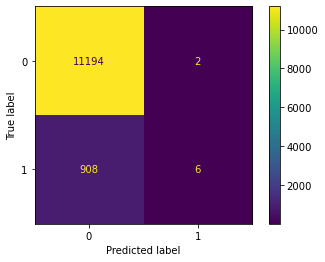

In [84]:
pred = lr_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Logistic Reg UnderSampled

In [85]:
best_model = tune_LR(X_us, X_valid, Y_us, y_valid)

solver= newton-cg, c = 0.001, epochs = 1000
solver= newton-cg, c = 0.001, epochs = 10000
solver= newton-cg, c = 0.001, epochs = 100000
solver= newton-cg, c = 0.01, epochs = 1000
solver= newton-cg, c = 0.01, epochs = 10000
solver= newton-cg, c = 0.01, epochs = 100000
solver= newton-cg, c = 0.1, epochs = 1000
solver= newton-cg, c = 0.1, epochs = 10000
solver= newton-cg, c = 0.1, epochs = 100000
solver= newton-cg, c = 1, epochs = 1000
solver= newton-cg, c = 1, epochs = 10000
solver= newton-cg, c = 1, epochs = 100000
solver= newton-cg, c = 10, epochs = 1000
solver= newton-cg, c = 10, epochs = 10000
solver= newton-cg, c = 10, epochs = 100000
solver= newton-cg, c = 100, epochs = 1000
solver= newton-cg, c = 100, epochs = 10000
solver= newton-cg, c = 100, epochs = 100000
solver= newton-cg, c = 1000, epochs = 1000
solver= newton-cg, c = 1000, epochs = 10000
solver= newton-cg, c = 1000, epochs = 100000
solver= newton-cg, c = 10000, epochs = 1000
solver= newton-cg, c = 10000, epochs = 10000
solve

/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver= sag, c = 10000, epochs = 10000
solver= sag, c = 10000, epochs = 100000
solver= saga, c = 0.001, epochs = 1000
solver= saga, c = 0.001, epochs = 10000
solver= saga, c = 0.001, epochs = 100000
solver= saga, c = 0.01, epochs = 1000
solver= saga, c = 0.01, epochs = 10000
solver= saga, c = 0.01, epochs = 100000
solver= saga, c = 0.1, epochs = 1000
solver= saga, c = 0.1, epochs = 10000
solver= saga, c = 0.1, epochs = 100000
solver= saga, c = 1, epochs = 1000
solver= saga, c = 1, epochs = 10000
solver= saga, c = 1, epochs = 100000
solver= saga, c = 10, epochs = 1000
solver= saga, c = 10, epochs = 10000
solver= saga, c = 10, epochs = 100000
solver= saga, c = 100, epochs = 1000
solver= saga, c = 100, epochs = 10000
solver= saga, c = 100, epochs = 100000
solver= saga, c = 1000, epochs = 1000
solver= saga, c = 1000, epochs = 10000
solver= saga, c = 1000, epochs = 100000
solver= saga, c = 10000, epochs = 1000


/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver= saga, c = 10000, epochs = 10000
solver= saga, c = 10000, epochs = 100000


In [86]:
best_model

('newton-cg', 0.1, 1000)

In [87]:
lReg = LogisticRegression( solver=best_model[0], C= best_model[1], max_iter=best_model[2])
lr_model = lReg.fit(X_us, Y_us)

Test Accuracy:0.6916597853014038
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     11196
           1       0.15      0.67      0.25       914

    accuracy                           0.69     12110
   macro avg       0.56      0.68      0.53     12110
weighted avg       0.90      0.69      0.76     12110



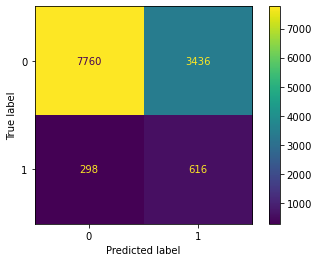

In [88]:
pred = lr_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Logistic Reg OverSampled

In [89]:
best_model = tune_LR(X_os, X_valid, Y_os, y_valid)

solver= newton-cg, c = 0.001, epochs = 1000
solver= newton-cg, c = 0.001, epochs = 10000
solver= newton-cg, c = 0.001, epochs = 100000
solver= newton-cg, c = 0.01, epochs = 1000
solver= newton-cg, c = 0.01, epochs = 10000
solver= newton-cg, c = 0.01, epochs = 100000
solver= newton-cg, c = 0.1, epochs = 1000
solver= newton-cg, c = 0.1, epochs = 10000
solver= newton-cg, c = 0.1, epochs = 100000
solver= newton-cg, c = 1, epochs = 1000
solver= newton-cg, c = 1, epochs = 10000
solver= newton-cg, c = 1, epochs = 100000
solver= newton-cg, c = 10, epochs = 1000
solver= newton-cg, c = 10, epochs = 10000
solver= newton-cg, c = 10, epochs = 100000
solver= newton-cg, c = 100, epochs = 1000
solver= newton-cg, c = 100, epochs = 10000
solver= newton-cg, c = 100, epochs = 100000
solver= newton-cg, c = 1000, epochs = 1000
solver= newton-cg, c = 1000, epochs = 10000
solver= newton-cg, c = 1000, epochs = 100000
solver= newton-cg, c = 10000, epochs = 1000
solver= newton-cg, c = 10000, epochs = 10000
solve

In [90]:
lReg = LogisticRegression( solver=best_model[0], C= best_model[1], max_iter=best_model[2])
lr_model = lReg.fit(X_os, Y_os)

Test Accuracy:0.6914120561519406
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     11196
           1       0.15      0.67      0.25       914

    accuracy                           0.69     12110
   macro avg       0.56      0.68      0.53     12110
weighted avg       0.90      0.69      0.76     12110



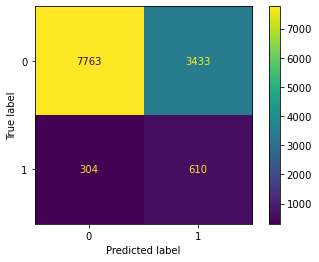

In [91]:
pred = lr_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Navie Bayes Impalanced

Test Accuracy:0.2884393063583815
              precision    recall  f1-score   support

           0       0.95      0.24      0.39     11196
           1       0.08      0.85      0.15       914

    accuracy                           0.29     12110
   macro avg       0.52      0.55      0.27     12110
weighted avg       0.89      0.29      0.37     12110



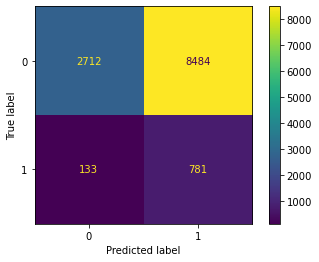

In [92]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_imp,Y_imp)
pred = gnb_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Navie Bayes UnderSampled

Test Accuracy:0.7903385631709331
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     11196
           1       0.13      0.32      0.19       914

    accuracy                           0.79     12110
   macro avg       0.53      0.57      0.53     12110
weighted avg       0.88      0.79      0.83     12110



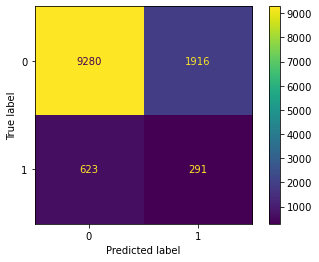

In [93]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_us,Y_us)
pred = gnb_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Navie Bayes OverSampled

Test Accuracy:0.23377374071015689
              precision    recall  f1-score   support

           0       0.95      0.18      0.30     11196
           1       0.08      0.89      0.15       914

    accuracy                           0.23     12110
   macro avg       0.52      0.53      0.23     12110
weighted avg       0.89      0.23      0.29     12110



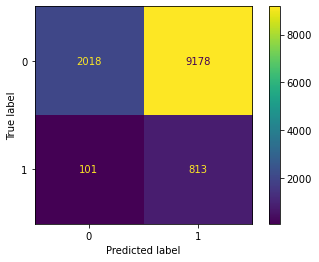

In [94]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_os,Y_os)
pred = gnb_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### DT UnderSample

depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 11
depth: 12
depth: 13
depth: 14
depth: 15
depth: 16
depth: 17
depth: 18
depth: 19
depth: 20
depth: 21
depth: 22
depth: 23
depth: 24
depth: 25
depth: 26
depth: 27
depth: 28
depth: 29
depth: 30
depth: 31
depth: 32
depth: 33


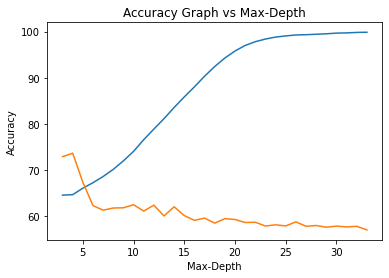

In [95]:
best_depth = tune_DT(X_us, X_valid, Y_us, y_valid)

In [96]:
dt_model ,_,_, _ = dt_clf(X_us, X_valid, Y_us, y_valid, max_depth = best_depth, plot= False)

Test Accuracy:0.7432700247729149
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     11196
           1       0.16      0.57      0.25       914

    accuracy                           0.74     12110
   macro avg       0.56      0.66      0.55     12110
weighted avg       0.90      0.74      0.80     12110



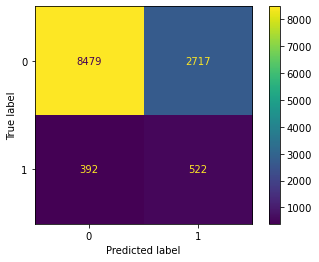

In [97]:
pred = dt_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### DT Impalanced

depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 11
depth: 12
depth: 13
depth: 14
depth: 15
depth: 16
depth: 17
depth: 18
depth: 19
depth: 20
depth: 21
depth: 22
depth: 23
depth: 24
depth: 25
depth: 26
depth: 27
depth: 28
depth: 29
depth: 30
depth: 31
depth: 32
depth: 33


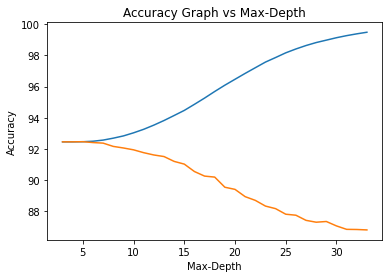

In [98]:
best_depth = tune_DT(X_imp, X_valid, Y_imp, y_valid)

In [99]:
dt_model ,_,_ , _ = dt_clf(X_imp, X_valid, Y_imp , y_valid, max_depth = best_depth, plot= False)

Test Accuracy:0.8753096614368291
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11196
           1       0.14      0.13      0.14       914

    accuracy                           0.88     12110
   macro avg       0.54      0.53      0.53     12110
weighted avg       0.87      0.88      0.87     12110



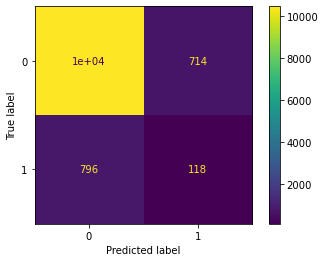

In [100]:
pred = dt_model.predict(X_test)
plot_confusion(y_test, pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### DT OverSample

depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 11
depth: 12
depth: 13
depth: 14
depth: 15
depth: 16
depth: 17
depth: 18
depth: 19
depth: 20
depth: 21
depth: 22
depth: 23
depth: 24
depth: 25
depth: 26
depth: 27
depth: 28
depth: 29
depth: 30
depth: 31
depth: 32
depth: 33


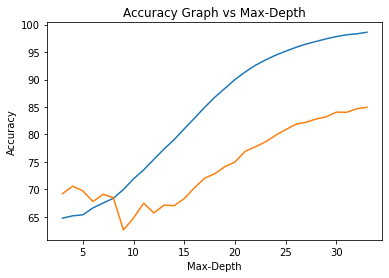

In [101]:
best_depth = tune_DT(X_os, X_valid, Y_os, y_valid)

In [102]:
dt_model ,_,_,_ = dt_clf(X_os, X_valid, Y_os, y_valid, max_depth = best_depth, plot= False)

Test Accuracy:0.715028901734104
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     11196
           1       0.15      0.61      0.24       914

    accuracy                           0.72     12110
   macro avg       0.55      0.66      0.53     12110
weighted avg       0.90      0.72      0.78     12110



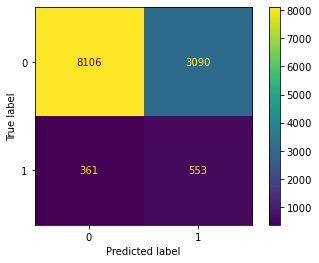

In [103]:
pred = dt_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### KNN UnderSampled

K: 5
K: 15
K: 25
K: 35
K: 45
K: 55
K: 65
K: 75
K: 85
K: 95
K: 105
K: 115


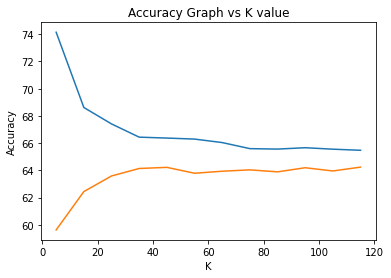

In [104]:
best_k = tune_knn(X_us, X_valid, Y_us, y_valid)

In [105]:
knn_model, _, _ ,_ = knn_clf(X_us, X_valid, Y_us, y_valid, best_k, plot = False)

Test Accuracy:0.6459124690338564
              precision    recall  f1-score   support

           0       0.96      0.65      0.77     11196
           1       0.13      0.64      0.21       914

    accuracy                           0.65     12110
   macro avg       0.54      0.64      0.49     12110
weighted avg       0.89      0.65      0.73     12110



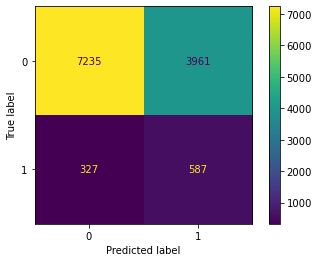

In [106]:
pred = knn_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### KNN Impalanced

In [107]:
# best_k = tune_knn(X_imp, X_valid, Y_imp, y_valid)

In [108]:
knn_model, _, _,_  = knn_clf(X_imp, X_valid, Y_imp, y_valid, best_k, plot = False)

Test Accuracy:0.924525185796862
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11196
           1       0.00      0.00      0.00       914

    accuracy                           0.92     12110
   macro avg       0.46      0.50      0.48     12110
weighted avg       0.85      0.92      0.89     12110



/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


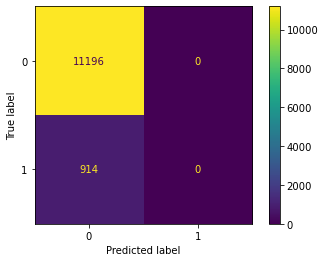

In [109]:
pred = knn_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### KNN OverSample

In [110]:
# best_k = tune_knn(X_os, X_valid, Y_os, y_valid)

In [111]:
knn_model, _, _,_  = knn_clf(X_os, X_valid, Y_os, y_valid, best_k, plot = False)

Test Accuracy:0.6275805119735756
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     11196
           1       0.11      0.58      0.19       914

    accuracy                           0.63     12110
   macro avg       0.53      0.61      0.47     12110
weighted avg       0.89      0.63      0.72     12110



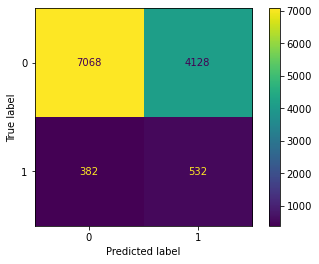

In [112]:
pred = knn_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

In [113]:
# X_train, X_valid, y_train, y_valid = over_sample(encoded_X, Y, test_size=0.1)


In [114]:
# rf_model, _, _ = RF_clf(X_train, X_valid, y_train, y_valid, n_esimators = best_n, plot= False)
# # print(f"Traing Accuracy: {tracc}, Valid Accuracy: {vacc}")

In [115]:
# # X_test,y_test = encode_data(test_data)
# pred = rf_model.predict(X_test)
# plot_confusion(pred,y_test,pred,y_test)
# print(f'Test Accuracy:{(pred == y_test).mean()}')
# print(classification_report(y_test,pred))

The Best Model Gotten is Random Forest With OverSampling 

### SVM Under Sample

In [116]:
best_model = tune_svm(X_us, X_valid, Y_us, y_valid)

poly 1
poly 2
poly 3
rbf
sigmoid


In [117]:
svm_model, _, _ ,_= svm_clf(X_us, X_valid, Y_us, y_valid,
                        kernel = best_model[0], degree =  best_model[1],c =  best_model[2], plot = False)

Test Accuracy:0.7448389760528489
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     11196
           1       0.17      0.59      0.26       914

    accuracy                           0.74     12110
   macro avg       0.56      0.67      0.55     12110
weighted avg       0.90      0.74      0.80     12110



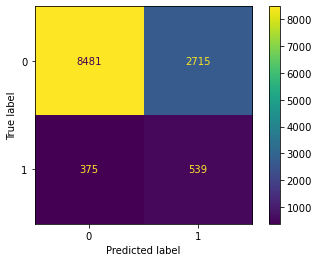

In [118]:
pred = svm_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### SVM Impalanced data

In [119]:
# best_model = tune_svm(X_imp, X_valid, Y_imp, y_valid)

In [120]:
svm_model, _, _ ,_= svm_clf(X_imp, X_valid, Y_imp, y_valid,
                        kernel = best_model[0], degree =  best_model[1],c =  best_model[2], plot = False)

Test Accuracy:0.924525185796862
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11196
           1       0.00      0.00      0.00       914

    accuracy                           0.92     12110
   macro avg       0.46      0.50      0.48     12110
weighted avg       0.85      0.92      0.89     12110



/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/khalid/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


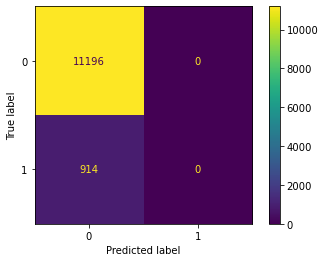

In [121]:
pred = svm_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### SVM Over sample

In [122]:
# best_model = tune_svm(X_os, X_valid, Y_os, y_valid)

In [123]:
svm_model, _, _, _ = svm_clf(X_os, X_valid, Y_os, y_valid,
                        kernel = best_model[0], degree =  best_model[1],c =  best_model[2], plot = False)

Test Accuracy:0.7019818331957061
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     11196
           1       0.15      0.64      0.25       914

    accuracy                           0.70     12110
   macro avg       0.56      0.68      0.53     12110
weighted avg       0.90      0.70      0.77     12110



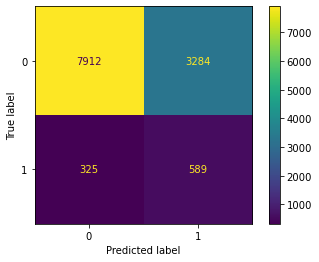

In [124]:
pred = svm_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Random Forest UnderSampled

N: 2
N: 7
N: 12
N: 17
N: 22
N: 27
N: 32
N: 37
N: 42
N: 47
N: 52
N: 57


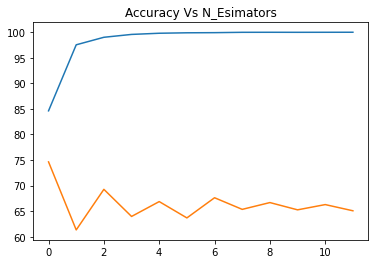

In [125]:
best_esimators = tune_RF(X_us, X_valid, Y_us, y_valid)

In [126]:
rf_model, _, _, _ = RF_clf(X_us, X_valid, Y_us, y_valid, n_esimators = best_esimators, plot= False)

Test Accuracy:0.6620974401321222
              precision    recall  f1-score   support

           0       0.96      0.66      0.78     11196
           1       0.14      0.67      0.23       914

    accuracy                           0.66     12110
   macro avg       0.55      0.66      0.51     12110
weighted avg       0.90      0.66      0.74     12110



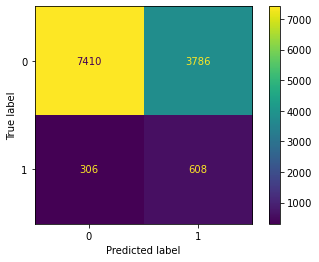

In [127]:
pred = rf_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

## Random Forest Impalanced


N: 2
N: 7
N: 12
N: 17
N: 22
N: 27
N: 32
N: 37
N: 42
N: 47
N: 52
N: 57
N: 62
N: 67
N: 72
N: 77
N: 82
N: 87
N: 92
N: 97


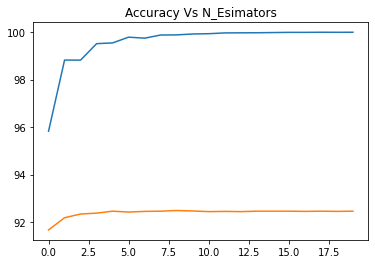

In [128]:
best_esimators = tune_RF(X_imp, X_valid, Y_imp, y_valid)

In [129]:
rf_model, _, _, _ = RF_clf(X_imp, X_valid, Y_imp, y_valid, n_esimators = best_esimators, plot= False)

Test Accuracy:0.9208918249380678
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11196
           1       0.23      0.02      0.04       914

    accuracy                           0.92     12110
   macro avg       0.58      0.51      0.50     12110
weighted avg       0.87      0.92      0.89     12110



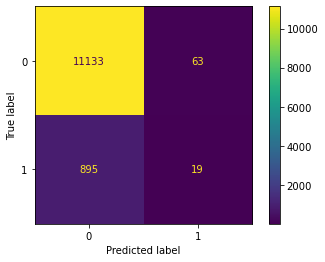

In [130]:
pred = rf_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))

### Random Forest *OverSampled*

N: 2
N: 7
N: 12
N: 17
N: 22


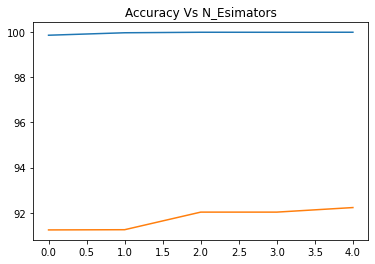

In [131]:
best_esimators = tune_RF(X_os, X_valid, Y_os, y_valid)

In [132]:
rf_model, _, _, _ = RF_clf(X_os, X_valid, Y_os, y_valid, n_esimators = best_esimators, plot= False)

Test Accuracy:0.9132122213047068
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11196
           1       0.22      0.06      0.10       914

    accuracy                           0.91     12110
   macro avg       0.58      0.52      0.53     12110
weighted avg       0.87      0.91      0.89     12110



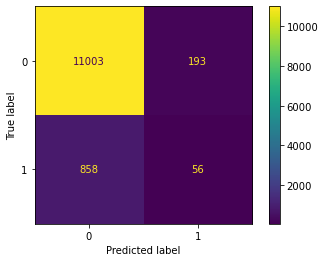

In [133]:
pred = rf_model.predict(X_test)
plot_confusion(y_test,pred)
print(f'Test Accuracy:{(pred == y_test).mean()}')
print(classification_report(y_test,pred))